In [1]:
"""
Python 3.10 Best models Spaceship_Titanic program will you survive on the spaceship titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-06-25
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))



#misc libraries
import random
import time
import datetime
import plotly.graph_objects as go
import plotly.express as px

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
pandas version: 1.4.3
matplotlib version: 3.6.3
NumPy version: 1.23.0
SciPy version: 1.10.0
IPython version: 8.9.0
scikit-learn version: 1.2.1
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from category_encoders import OneHotEncoder, MEstimateEncoder, GLMMEncoder, OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression
from sklearn.linear_model import TheilSenRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
df_2008 = pd.read_csv('Data/CEAPS_2008.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2009 = pd.read_csv('Data/CEAPS_2009.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2010 = pd.read_csv('Data/CEAPS_2010.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2011 = pd.read_csv('Data/CEAPS_2011.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2012 = pd.read_csv('Data/CEAPS_2012.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2013 = pd.read_csv('Data/CEAPS_2013.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2014 = pd.read_csv('Data/CEAPS_2014.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2015 = pd.read_csv('Data/CEAPS_2015.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2016 = pd.read_csv('Data/CEAPS_2016.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2017 = pd.read_csv('Data/CEAPS_2017.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2018 = pd.read_csv('Data/CEAPS_2018.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2019 = pd.read_csv('Data/CEAPS_2019.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2020 = pd.read_csv('Data/CEAPS_2020.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2021 = pd.read_csv('Data/CEAPS_2021.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_2022 = pd.read_csv('Data/CEAPS_2022.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_exercicio_56 = pd.read_csv('Data/exercicio_56.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)
df_exercicio_55 = pd.read_csv('Data/exercicio_55.csv', sep=';', encoding = 'utf-8', skiprows=0)

In [4]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                2449 non-null   int64  
 1   MES                2449 non-null   int64  
 2   SENADOR            2449 non-null   object 
 3   TIPO_DESPESA       2449 non-null   object 
 4   CNPJ_CPF           0 non-null      float64
 5   FORNECEDOR         0 non-null      float64
 6   DOCUMENTO          0 non-null      float64
 7   DATA               0 non-null      float64
 8   DETALHAMENTO       0 non-null      float64
 9   VALOR_REEMBOLSADO  2449 non-null   object 
 10  COD_DOCUMENTO      2449 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 210.6+ KB


In [5]:
df_2008.describe()

ANO          MES  CNPJ_CPF  FORNECEDOR  DOCUMENTO  DATA  \
count  2449.0  2449.000000       0.0         0.0        0.0   0.0   
mean   2008.0     7.000817       NaN         NaN        NaN   NaN   
std       0.0     3.245912       NaN         NaN        NaN   NaN   
min    2008.0     2.000000       NaN         NaN        NaN   NaN   
25%    2008.0     4.000000       NaN         NaN        NaN   NaN   
50%    2008.0     7.000000       NaN         NaN        NaN   NaN   
75%    2008.0    10.000000       NaN         NaN        NaN   NaN   
max    2008.0    12.000000       NaN         NaN        NaN   NaN   

       DETALHAMENTO  COD_DOCUMENTO  
count           0.0   2.449000e+03  
mean            NaN   2.008070e+12  
std             NaN   3.245635e+07  
min             NaN   2.008020e+12  
25%             NaN   2.008040e+12  
50%             NaN   2.008070e+12  
75%             NaN   2.008100e+12  
max             NaN   2.008121e+12

In [6]:
print('Null values in CEAPS 2008:\n', df_2008.isna().sum())

Null values in CEAPS 2008:
 ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF             2449
FORNECEDOR           2449
DOCUMENTO            2449
DATA                 2449
DETALHAMENTO         2449
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64


In [7]:
df_2008.SENADOR.value_counts()

CRISTOVAM BUARQUE        47
PATRÍCIA SABOYA GOMES    46
IDELI SALVATTI           45
HERÁCLITO FORTES         45
JOSÉ NERY                45
                         ..
GILVAM BORGES             7
CARLOS DUNGA              5
GEOVANI BORGES            4
ARTHUR VIRGÍLIO           4
MARIA DO CARMO ALVES      4
Name: SENADOR, Length: 85, dtype: int64

In [8]:
df_2008.groupby('SENADOR')['TIPO_DESPESA'].count()

SENADOR
ADA MELLO                          8
ADELMIR SANTANA                   22
ALMEIDA LIMA                      36
ALOIZIO MERCADANTE                44
ALVARO DIAS                       39
                                  ..
TIÃO VIANA                        39
VALDIR RAUPP                      15
VALTER PEREIRA                    32
VIRGINIO DE CARVALHO              23
WELLINGTON SALGADO DE OLIVEIRA    43
Name: TIPO_DESPESA, Length: 85, dtype: int64

In [9]:
df_2008['VALOR_REEMBOLSADO'].replace(',','.', inplace=True, regex=True)

In [10]:
df_2008['VALOR_REEMBOLSADO'] = df_2008['VALOR_REEMBOLSADO'].astype(float)

In [11]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                2449 non-null   int64  
 1   MES                2449 non-null   int64  
 2   SENADOR            2449 non-null   object 
 3   TIPO_DESPESA       2449 non-null   object 
 4   CNPJ_CPF           0 non-null      float64
 5   FORNECEDOR         0 non-null      float64
 6   DOCUMENTO          0 non-null      float64
 7   DATA               0 non-null      float64
 8   DETALHAMENTO       0 non-null      float64
 9   VALOR_REEMBOLSADO  2449 non-null   float64
 10  COD_DOCUMENTO      2449 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 210.6+ KB


In [12]:
df_2008.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
ROMEU TUMA              179192.22
VALDIR RAUPP            178862.67
JOÃO RIBEIRO            173496.20
PAULO DUQUE             170078.86
JOSÉ AGRIPINO           169906.44
                          ...    
MARCO ANTÔNIO COSTA      45354.64
EDUARDO SUPLICY          33053.55
TASSO JEREISSATI         27865.00
ARTHUR VIRGÍLIO          15696.94
MARIA DO CARMO ALVES     14862.24
Name: VALOR_REEMBOLSADO, Length: 85, dtype: float64

In [13]:
# PRECISO AGRUPAR 4 ANOS DO MESMO MANDATO PARA TER O VALOR TOTAL

In [14]:
print('CEAPS 2019:\n', df_2019.info())
print('CEAPS 2020:\n', df_2020.info())
print('CEAPS 2021:\n', df_2021.info())
print('CEAPS 2022:\n', df_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                21634 non-null  int64 
 1   MES                21634 non-null  int64 
 2   SENADOR            21634 non-null  object
 3   TIPO_DESPESA       21634 non-null  object
 4   CNPJ_CPF           21634 non-null  object
 5   FORNECEDOR         21634 non-null  object
 6   DOCUMENTO          20900 non-null  object
 7   DATA               21634 non-null  object
 8   DETALHAMENTO       13092 non-null  object
 9   VALOR_REEMBOLSADO  21634 non-null  object
 10  COD_DOCUMENTO      21634 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.8+ MB
CEAPS 2019:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO 

In [15]:
#df_combine = pd.merge(df_2019, df_2020, on = 'SENADOR', how='outer')
#df_combine.head(5)

In [16]:
combine = df_2019.append(df_2020, ignore_index=False)
combine = combine.append(df_2021, ignore_index=False)
combine = combine.append(df_2022, ignore_index=False)
df_combine = pd.DataFrame(data=combine)
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69333 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                69333 non-null  int64 
 1   MES                69333 non-null  int64 
 2   SENADOR            69333 non-null  object
 3   TIPO_DESPESA       69333 non-null  object
 4   CNPJ_CPF           69333 non-null  object
 5   FORNECEDOR         69333 non-null  object
 6   DOCUMENTO          66370 non-null  object
 7   DATA               69333 non-null  object
 8   DETALHAMENTO       38583 non-null  object
 9   VALOR_REEMBOLSADO  69333 non-null  object
 10  COD_DOCUMENTO      69333 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 6.3+ MB


In [17]:
df_combine.head(5)

ANO  MES       SENADOR                                       TIPO_DESPESA  \
0  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
1  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
2  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
4  2019    2  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   

             CNPJ_CPF                     FORNECEDOR  DOCUMENTO        DATA  \
0  05.914.650/0001-66                       ENERGISA  006582758  04/01/2019   
1  05.914.650/0001-66                       ENERGISA  006582755  04/01/2019   
2      004.948.028-63  GILBERTO PISELO DO NASCIMENTO      00119  07/01/2019   
3  05.423.963/0001-11                  OI MÓVEL S.A.   86161151  25/12/2018   
4  05.914.650/0001-66                       ENERGISA  007236036  04/02/2019   

                                        DETALHAMENTO VALOR_REEMBOLSADO  \
0  Despesa com pagamento de energia elétrica do e...             66,02   
1  Despesa com pagamento de energia elétrica do e...            139,98   
2  Despesa com pagamento de aluguel de imóvel par...              6000   
3  Despesa com pagamento de telefonia para o escr...            316,39   
4  Despesa com pagamento de energia elétrica para...             99,45   

   COD_DOCUMENTO  
0        2116543  
1        2116546  
2        2113817  
3        2116541  
4        2116550

In [18]:
df_combine.ANO.value_counts()

2019    21634
2021    16827
2022    16782
2020    14090
Name: ANO, dtype: int64

In [19]:
df_combine.SENADOR.value_counts()

CARLOS VIANA            2136
JAQUES WAGNER           2077
WELLINGTON FAGUNDES     1976
HUMBERTO COSTA          1930
PAULO PAIM              1867
                        ... 
VIRGINIO DE CARVALHO       3
HÉLIO JOSÉ                 3
EDISON LOBÃO               2
NAILDE PANTA               1
VICENTINHO ALVES           1
Name: SENADOR, Length: 153, dtype: int64

In [20]:
df_combine['VALOR_REEMBOLSADO'].replace(',','.', regex=True, inplace=True)

In [21]:
df_combine['VALOR_REEMBOLSADO']

0          66.02
1         139.98
2           6000
3         316.39
4          99.45
          ...   
16777    2893.04
16778    1180.19
16779     2671.9
16780    1334.31
16781    2250.72
Name: VALOR_REEMBOLSADO, Length: 69333, dtype: object

In [22]:
df_combine['VALOR_REEMBOLSADO'] = df_combine['VALOR_REEMBOLSADO'].astype(float)

In [23]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69333 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                69333 non-null  int64  
 1   MES                69333 non-null  int64  
 2   SENADOR            69333 non-null  object 
 3   TIPO_DESPESA       69333 non-null  object 
 4   CNPJ_CPF           69333 non-null  object 
 5   FORNECEDOR         69333 non-null  object 
 6   DOCUMENTO          66370 non-null  object 
 7   DATA               69333 non-null  object 
 8   DETALHAMENTO       38583 non-null  object 
 9   VALOR_REEMBOLSADO  69333 non-null  float64
 10  COD_DOCUMENTO      69333 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 6.3+ MB


In [24]:
df_combine.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
TELMÁRIO MOTA           1951401.21
ROGÉRIO CARVALHO        1928300.49
MECIAS DE JESUS         1913241.64
PAULO ROCHA             1885315.28
MAILZA GOMES            1793120.58
                           ...    
SIQUEIRA CAMPOS            5926.99
VIRGINIO DE CARVALHO       5720.56
MAGNO MALTA                4725.79
JOSÉ PIMENTEL              4713.74
NAILDE PANTA               1650.62
Name: VALOR_REEMBOLSADO, Length: 153, dtype: float64

In [25]:
df_combine.groupby('ANO')['SENADOR'].value_counts()

ANO   SENADOR                      
2019  WELLINGTON FAGUNDES              875
      HUMBERTO COSTA                   631
      MAJOR OLIMPIO                    606
      PAULO PAIM                       584
      TELMÁRIO MOTA                    582
                                      ... 
2022  CHIQUINHO FEITOSA                 11
      LUIZ PASTORE                      11
      SAMUEL ARAUJO                      4
      MARIA ELIZA DE AGUIAR E SILVA      3
      JOSÉ ANÍBAL                        2
Name: SENADOR, Length: 394, dtype: int64

In [26]:
df_combine.nunique()

ANO                      4
MES                     12
SENADOR                153
TIPO_DESPESA             7
CNPJ_CPF              7670
FORNECEDOR            8692
DOCUMENTO            55369
DATA                  1559
DETALHAMENTO         22485
VALOR_REEMBOLSADO    31855
COD_DOCUMENTO        69333
dtype: int64

In [27]:
df_combine['TIPO_DESPESA'].value_counts()

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   25518
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           15206
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 14897
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      5007
Divulgação da atividade parlamentar                                                                                                                                                                 

In [28]:
print('Valores únicos 2019:\n', df_2019.nunique())
print('\n')
print('Valores únicos 2020:\n', df_2020.nunique())
print('\n')
print('Valores únicos 2021:\n', df_2021.nunique())
print('\n')
print('Valores únicos 2022:\n', df_2022.nunique())
print('\n')

print('Soma total de senadores:\n', df_2019['SENADOR'].nunique() + df_2020['SENADOR'].nunique() + df_2021['SENADOR'].nunique() + df_2022['SENADOR'].nunique())

print('\n')

print('Valores únicos datasets combinados:\n', df_combine.nunique())

Valores únicos 2019:
 ANO                      1
MES                     12
SENADOR                127
TIPO_DESPESA             7
CNPJ_CPF              3621
FORNECEDOR            4026
DOCUMENTO            18719
DATA                   453
DETALHAMENTO          8463
VALOR_REEMBOLSADO    11751
COD_DOCUMENTO        21634
dtype: int64


Valores únicos 2020:
 ANO                      1
MES                     12
SENADOR                 84
TIPO_DESPESA             7
CNPJ_CPF              2406
FORNECEDOR            2595
DOCUMENTO            11611
DATA                   457
DETALHAMENTO          4078
VALOR_REEMBOLSADO     7135
COD_DOCUMENTO        14090
dtype: int64


Valores únicos 2021:
 ANO                      1
MES                     12
SENADOR                 86
TIPO_DESPESA             7
CNPJ_CPF              2798
FORNECEDOR            2995
DOCUMENTO            14338
DATA                   450
DETALHAMENTO          5699
VALOR_REEMBOLSADO     8869
COD_DOCUMENTO        16827
dtype: int64


- Pegar os anos das eleições para o senado, verificar o número de senadores eleitos.
- Fazer uma lista dos nomes dos senadores eleitos no período escolhido
- Fazer isin dentro dos valores do dataset e os senadores eleitos
- Identificar valores errados/nulos e eliminar do dataset

In [29]:
nuniques_2019 = df_2019.drop_duplicates(subset=['SENADOR'])
#nuniques_2019
senadores_2019 = nuniques_2019['SENADOR'].tolist()
len(senadores_2019)

127

In [30]:
nuniques_2020 = df_2020.drop_duplicates(subset=['SENADOR'])
#nuniques_2020
senadores_2020 = nuniques_2020['SENADOR'].tolist()
len(senadores_2020)

84

In [31]:
nuniques_2021 = df_2021.drop_duplicates(subset=['SENADOR'])
#nuniques_2019
senadores_2021 = nuniques_2021['SENADOR'].tolist()
len(senadores_2021)

86

In [32]:
nuniques_2022 = df_2022.drop_duplicates(subset=['SENADOR'])
#nuniques_2019
senadores_2022 = nuniques_2022['SENADOR'].tolist()
len(senadores_2022)

97

In [33]:
s = set(senadores_2020)
temp3 = [x for x in senadores_2019 if x not in s]
print(temp3)

['AÉCIO NEVES', 'ALOYSIO NUNES FERREIRA', 'ANA AMÉLIA', 'ÂNGELA PORTELA', 'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO', 'ATAÍDES OLIVEIRA', 'BENEDITO DE LIRA', 'BLAIRO MAGGI', 'CÁSSIO CUNHA LIMA', 'DALIRIO BEBER', 'EDISON LOBÃO', 'EDUARDO AMORIM', 'EDUARDO GIRÃO', 'FLEXA RIBEIRO', 'GARIBALDI ALVES FILHO', 'GLEISI HOFFMANN', 'GUARACY SILVEIRA', 'HÉLIO JOSÉ', 'IVO CASSOL', 'JOÃO ALBERTO SOUZA', 'JOÃO CAPIBERIBE', 'JORGE VIANA', 'JOSÉ AGRIPINO', 'JOSÉ MEDEIROS', 'JOSÉ PIMENTEL', 'LÍDICE DA MATA', 'LINDBERGH FARIAS', 'LÚCIA VÂNIA', 'MAGNO MALTA', 'MARTA SUPLICY', 'PAULO BAUER', 'PEDRO CHAVES DOS SANTOS FILHO', 'RAIMUNDO LIRA', 'RENILDE BULHÕES', 'RICARDO FERRAÇO', 'ROBERTO REQUIÃO', 'ROMERO JUCÁ', 'SIQUEIRA CAMPOS', 'VALDIR RAUPP', 'VANESSA GRAZZIOTIN', 'VICENTINHO ALVES', 'WALDEMIR MOKA', 'WALTER PINHEIRO', 'WILDER MORAIS', 'ZÉ SANTANA', 'ZEZÉ PERRELLA']


In [34]:
df_exercicio_56.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [35]:
senadores_exercicio = df_exercicio_56['NOME_PARLAMENTAR'].tolist()

In [36]:
s = set(senadores_exercicio)
temp3 = [x for x in senadores_2022 if x not in s]
print('eleitos em 2022:\n', len(temp3))

eleitos em 2022:
 44


In [37]:
df_exercicio_56 = pd.DataFrame(df_exercicio_56)

In [38]:
'''
df_exercicio = [df_exercicio]
#df_exercício['INICIO'] = df_exercicio.MANDATO.split()
for dataset in df_exercicio:
    dataset['INICIO'] = dataset['MANDATO'].apply(lambda x: x.split('/')[0]).astype(int)
    dataset['FIM'] = dataset['MANDATO'].apply(lambda x: x.split('/')[1]).astype(int)

    
df_exercicio
'''

"\ndf_exercicio = [df_exercicio]\n#df_exercício['INICIO'] = df_exercicio.MANDATO.split()\nfor dataset in df_exercicio:\n    dataset['INICIO'] = dataset['MANDATO'].apply(lambda x: x.split('/')[0]).astype(int)\n    dataset['FIM'] = dataset['MANDATO'].apply(lambda x: x.split('/')[1]).astype(int)\n\n    \ndf_exercicio\n"

In [39]:
df_exercicio_56['INICIO'] = df_exercicio_56.MANDATO.apply(lambda x: x.split('/')[0]).astype(int)
df_exercicio_56['FIM'] = df_exercicio_56.MANDATO.apply(lambda x: x.split('/')[1]).astype(int)

In [40]:
df_exercicio_56.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [41]:
df_exercicio_56.drop('MANDATO', axis=1, inplace=True)
df_exercicio_56.head(3)

NOME_PARLAMENTAR PARTIDO  UF TITULARIDADE                     TELEFONES  \
0          ALAN RICK   UNIÃO  AC      Titular                (61)3303-6333,   
1  ALESSANDRO VIEIRA     MDB  SE      Titular  (61)3303-9011,(61)3303-9014,   
2   ANA PAULA LOBATO     PSB  MA  1º Suplente                (61)3303-2967,   

       DTNASC                               EMAIL  \
0  23/10/1976          sen.alanrick@senado.leg.br   
1  03/04/1975  sen.alessandrovieira@senado.leg.br   
2  11/05/1984    sen.anapaulalobato@senado.leg.br   

                             CHEFE_GAB  \
0  Lia Noleto De Queiroz Rachid Gariff   
1              Elaine Da Silva Gontijo   
2          Antino Correa Noleto Junior   

  ENDERECO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                \
0  SENADO FEDERAL ANEXO 2   ALA TEOTÔNIO VILELA G...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1  SENADO FEDERAL ANEXO 2   ALA AFFONSO ARINOS GA...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2  SENADO FEDERAL ANEXO 1  16º PAVIMENTO         ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [42]:
df_exercicio_56.loc[df_exercicio_56.INICIO == 2019]

NOME_PARLAMENTAR       PARTIDO  UF TITULARIDADE  \
1         ALESSANDRO VIEIRA           MDB  SE      Titular   
3            ANGELO CORONEL           PSD  BA      Titular   
7           CARLOS PORTINHO            PL  RJ  1º Suplente   
8              CARLOS VIANA       PODEMOS  MG      Titular   
9           CHICO RODRIGUES           PSB  RR      Titular   
10                CID GOMES           PDT  CE      Titular   
11            CIRO NOGUEIRA            PP  PI      Titular   
13           CONFUCIO MOURA           MDB  RO      Titular   
15         DANIELLA RIBEIRO           PSD  PB      Titular   
18            EDUARDO BRAGA           MDB  AM      Titular   
19            EDUARDO GIRÃO          NOVO  CE      Titular   
20            EDUARDO GOMES            PL  TO      Titular   
22            ELIZIANE GAMA           PSD  MA      Titular   
23          ESPERIDIÃO AMIN            PP  SC      Titular   
24        FABIANO CONTARATO            PT  ES      Titular   
25          FERNANDO DUEIRE           MDB  PE  1º Suplente   
27              FLÁVIO ARNS           PSB  PR      Titular   
28         FLÁVIO BOLSONARO            PL  RJ      Titular   
29                 GIORDANO           MDB  SP  1º Suplente   
31           HUMBERTO COSTA            PT  PE      Titular   
32                    IRAJÁ           PSD  TO      Titular   
33        IVETE DA SILVEIRA           MDB  SC  1º Suplente   
34             IZALCI LUCAS          PSDB  DF      Titular   
35           JADER BARBALHO           MDB  PA      Titular   
37            JAQUES WAGNER            PT  BA      Titular   
38             JAYME CAMPOS         UNIÃO  MT      Titular   
39             JORGE KAJURU           PSB  GO      Titular   
43             LEILA BARROS           PDT  DF      Titular   
44            LUCAS BARRETO           PSD  AP      Titular   
45       LUIS CARLOS HEINZE            PP  RS      Titular   
47            MARA GABRILLI           PSD  SP      Titular   
48           MARCELO CASTRO           MDB  PI      Titular   
49            MARCIO BITTAR         UNIÃO  AC      Titular   
50            MARCOS DO VAL       PODEMOS  ES      Titular   
51           MARCOS ROGÉRIO            PL  RO      Titular   
52        MARGARETH BUZETTI           PSD  MT  1º Suplente   
53          MECIAS DE JESUS  REPUBLICANOS  RR      Titular   
54      NELSINHO TRAD FILHO           PSD  MS      Titular   
56      ORIOVISTO GUIMARÃES       PODEMOS  PR      Titular   
58               PAULO PAIM            PT  RS      Titular   
59           PLÍNIO VALÉRIO          PSDB  AM      Titular   
61       RANDOLFE RODRIGUES          REDE  AP      Titular   
62          RENAN CALHEIROS           MDB  AL      Titular   
63            RODRIGO CUNHA       PODEMOS  AL      Titular   
64          RODRIGO PACHECO           PSD  MG      Titular   
65         ROGÉRIO CARVALHO            PT  SE      Titular   
69           SÉRGIO PETECÃO           PSD  AC      Titular   
70         SORAYA THRONICKE       PODEMOS  MS      Titular   
71       STYVENSON VALENTIM       PODEMOS  RN      Titular   
74        VANDERLAN CARDOSO           PSD  GO      Titular   
75  VENEZIANO VITAL DO RÊGO           MDB  PB      Titular   
76                 WEVERTON           PDT  MA      Titular   
78             ZENAIDE MAIA           PSD  RN      Titular   
79         ZEQUINHA MARINHO       PODEMOS  PA      Titular   

                                    TELEFONES      DTNASC  \
1                (61)3303-9011,(61)3303-9014,  03/04/1975   
3                (61)3303-6103,(61)3303-6105,  03/05/1958   
7                (61)3303-6640,(61)3303-6613,  02/07/1973   
8                              (61)3303-3100,  22/03/1963   
9                              (61)3303-2281,  23/04/1951   
10               (61)3303-6460,(61)3303-6399,  27/04/1963   
11               (61)3303-6187,(61)3303-6188,  21/11/1968   
13               (61)3303-2470,(61)3303-2163,  16/05/1948   
15               (61)3303-6788,(61)3303-6790,  26/0

In [43]:
df_2019.SENADOR.unique()

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'ALESSANDRO VIEIRA',
       'ALOYSIO NUNES FERREIRA', 'ALVARO DIAS', 'ANA AMÉLIA',
       'ÂNGELA PORTELA', 'ANGELO CORONEL', 'ANTONIO ANASTASIA',
       'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO',
       'AROLDE DE OLIVEIRA', 'ATAÍDES OLIVEIRA', 'BENEDITO DE LIRA',
       'BLAIRO MAGGI', 'CARLOS VIANA', 'CÁSSIO CUNHA LIMA',
       'CHICO RODRIGUES', 'CID GOMES', 'CIRO NOGUEIRA', 'CONFÚCIO MOURA',
       'DALIRIO BEBER', 'DANIELLA RIBEIRO', 'DÁRIO BERGER',
       'DAVI ALCOLUMBRE', 'EDISON LOBÃO', 'EDUARDO AMORIM',
       'EDUARDO BRAGA', 'EDUARDO GIRÃO', 'EDUARDO GOMES', 'ELIZIANE GAMA',
       'ELMANO FÉRRER', 'ESPERIDIÃO AMIN', 'FABIANO CONTARATO',
       'FERNANDO BEZERRA COELHO', 'FERNANDO COLLOR', 'FLÁVIO ARNS',
       'FLÁVIO BOLSONARO', 'FLEXA RIBEIRO', 'GARIBALDI ALVES FILHO',
       'GLEISI HOFFMANN', 'GUARACY SILVEIRA', 'HÉLIO JOSÉ',
       'HUMBERTO COSTA', 'IRAJÁ', 'IVO CASSOL', 'IZALCI LUCAS',
       'JADER BARBALHO', 'JAQUES WAGN

In [44]:
temp3 = [x for x in df_2019.SENADOR.unique() if x not in df_2020.SENADOR.unique()]
print(len(temp3))


47


In [45]:
['AÉCIO NEVES', 'ALOYSIO NUNES FERREIRA', 'ANA AMÉLIA', 'ÂNGELA PORTELA', 'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO', 'ATAÍDES OLIVEIRA', 'BENEDITO DE LIRA', 'BLAIRO MAGGI', 'CÁSSIO CUNHA LIMA', 'DALIRIO BEBER', 'EDISON LOBÃO', 'EDUARDO AMORIM', 'EDUARDO GIRÃO', 'FLEXA RIBEIRO', 'GARIBALDI ALVES FILHO', 'GLEISI HOFFMANN', 'GUARACY SILVEIRA', 'HÉLIO JOSÉ', 'IVO CASSOL', 'JOÃO ALBERTO SOUZA', 'JOÃO CAPIBERIBE', 'JORGE VIANA', 'JOSÉ AGRIPINO', 'JOSÉ MEDEIROS', 'JOSÉ PIMENTEL', 'LÍDICE DA MATA', 'LINDBERGH FARIAS', 'LÚCIA VÂNIA', 'MAGNO MALTA', 'MARTA SUPLICY', 'PAULO BAUER', 'PEDRO CHAVES DOS SANTOS FILHO', 'RAIMUNDO LIRA', 'RENILDE BULHÕES', 'RICARDO FERRAÇO', 'ROBERTO REQUIÃO', 'ROMERO JUCÁ', 'SIQUEIRA CAMPOS', 'VALDIR RAUPP', 'VANESSA GRAZZIOTIN', 'VICENTINHO ALVES', 'WALDEMIR MOKA', 'WALTER PINHEIRO', 'WILDER MORAIS', 'ZÉ SANTANA', 'ZEZÉ PERRELLA']

['AÉCIO NEVES',
 'ALOYSIO NUNES FERREIRA',
 'ANA AMÉLIA',
 'ÂNGELA PORTELA',
 'ANTÔNIO CARLOS VALADARES',
 'ARMANDO MONTEIRO',
 'ATAÍDES OLIVEIRA',
 'BENEDITO DE LIRA',
 'BLAIRO MAGGI',
 'CÁSSIO CUNHA LIMA',
 'DALIRIO BEBER',
 'EDISON LOBÃO',
 'EDUARDO AMORIM',
 'EDUARDO GIRÃO',
 'FLEXA RIBEIRO',
 'GARIBALDI ALVES FILHO',
 'GLEISI HOFFMANN',
 'GUARACY SILVEIRA',
 'HÉLIO JOSÉ',
 'IVO CASSOL',
 'JOÃO ALBERTO SOUZA',
 'JOÃO CAPIBERIBE',
 'JORGE VIANA',
 'JOSÉ AGRIPINO',
 'JOSÉ MEDEIROS',
 'JOSÉ PIMENTEL',
 'LÍDICE DA MATA',
 'LINDBERGH FARIAS',
 'LÚCIA VÂNIA',
 'MAGNO MALTA',
 'MARTA SUPLICY',
 'PAULO BAUER',
 'PEDRO CHAVES DOS SANTOS FILHO',
 'RAIMUNDO LIRA',
 'RENILDE BULHÕES',
 'RICARDO FERRAÇO',
 'ROBERTO REQUIÃO',
 'ROMERO JUCÁ',
 'SIQUEIRA CAMPOS',
 'VALDIR RAUPP',
 'VANESSA GRAZZIOTIN',
 'VICENTINHO ALVES',
 'WALDEMIR MOKA',
 'WALTER PINHEIRO',
 'WILDER MORAIS',
 'ZÉ SANTANA',
 'ZEZÉ PERRELLA']

In [46]:
df_2019.head(2)

ANO  MES       SENADOR                                       TIPO_DESPESA  \
0  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
1  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   

             CNPJ_CPF FORNECEDOR  DOCUMENTO        DATA  \
0  05.914.650/0001-66   ENERGISA  006582758  04/01/2019   
1  05.914.650/0001-66   ENERGISA  006582755  04/01/2019   

                                        DETALHAMENTO VALOR_REEMBOLSADO  \
0  Despesa com pagamento de energia elétrica do e...             66,02   
1  Despesa com pagamento de energia elétrica do e...            139,98   

   COD_DOCUMENTO  
0        2116543  
1        2116546

In [47]:
'''
df_2019['INICIO'] = df_2019.MANDATO.apply(lambda x: x.split('/')[0]).astype(int)
df_2019['FIM'] = df_2019.MANDATO.apply(lambda x: x.split('/')[1]).astype(int)

df_2019.drop('MANDATO', axis=1, inplace=True)

df_2019.loc[df_2019.FIM >= 2019]
'''

"\ndf_2019['INICIO'] = df_2019.MANDATO.apply(lambda x: x.split('/')[0]).astype(int)\ndf_2019['FIM'] = df_2019.MANDATO.apply(lambda x: x.split('/')[1]).astype(int)\n\ndf_2019.drop('MANDATO', axis=1, inplace=True)\n\ndf_2019.loc[df_2019.FIM >= 2019]\n"

In [48]:
df_2019.SENADOR.unique()

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'ALESSANDRO VIEIRA',
       'ALOYSIO NUNES FERREIRA', 'ALVARO DIAS', 'ANA AMÉLIA',
       'ÂNGELA PORTELA', 'ANGELO CORONEL', 'ANTONIO ANASTASIA',
       'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO',
       'AROLDE DE OLIVEIRA', 'ATAÍDES OLIVEIRA', 'BENEDITO DE LIRA',
       'BLAIRO MAGGI', 'CARLOS VIANA', 'CÁSSIO CUNHA LIMA',
       'CHICO RODRIGUES', 'CID GOMES', 'CIRO NOGUEIRA', 'CONFÚCIO MOURA',
       'DALIRIO BEBER', 'DANIELLA RIBEIRO', 'DÁRIO BERGER',
       'DAVI ALCOLUMBRE', 'EDISON LOBÃO', 'EDUARDO AMORIM',
       'EDUARDO BRAGA', 'EDUARDO GIRÃO', 'EDUARDO GOMES', 'ELIZIANE GAMA',
       'ELMANO FÉRRER', 'ESPERIDIÃO AMIN', 'FABIANO CONTARATO',
       'FERNANDO BEZERRA COELHO', 'FERNANDO COLLOR', 'FLÁVIO ARNS',
       'FLÁVIO BOLSONARO', 'FLEXA RIBEIRO', 'GARIBALDI ALVES FILHO',
       'GLEISI HOFFMANN', 'GUARACY SILVEIRA', 'HÉLIO JOSÉ',
       'HUMBERTO COSTA', 'IRAJÁ', 'IVO CASSOL', 'IZALCI LUCAS',
       'JADER BARBALHO', 'JAQUES WAGN

In [49]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69333 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                69333 non-null  int64  
 1   MES                69333 non-null  int64  
 2   SENADOR            69333 non-null  object 
 3   TIPO_DESPESA       69333 non-null  object 
 4   CNPJ_CPF           69333 non-null  object 
 5   FORNECEDOR         69333 non-null  object 
 6   DOCUMENTO          66370 non-null  object 
 7   DATA               69333 non-null  object 
 8   DETALHAMENTO       38583 non-null  object 
 9   VALOR_REEMBOLSADO  69333 non-null  float64
 10  COD_DOCUMENTO      69333 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 6.3+ MB


In [50]:
df_combine.ANO.value_counts()

2019    21634
2021    16827
2022    16782
2020    14090
Name: ANO, dtype: int64

In [51]:
df = df_combine.loc[df_combine['TIPO_DESPESA'] == 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes'].groupby('SENADOR').sum().sort_values(by='VALOR_REEMBOLSADO', ascending=False)

# New feature distribution
#plt.figure(figsize=(12,4))
#sns.barplot(data=df, x=df.SENADOR, y=df.VALOR_REEMBOLSADO)

#sns.barplot(data=df, x='SENADOR', y='VALOR_REEMBOLSADO')

acc_pay = df_combine.groupby('SENADOR').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values('VALOR_REEMBOLSADO',ascending = False).reset_index().head(30)
acc_pay


SENADOR  VALOR_REEMBOLSADO
0             TELMÁRIO MOTA         1951401.21
1          ROGÉRIO CARVALHO         1928300.49
2           MECIAS DE JESUS         1913241.64
3               PAULO ROCHA         1885315.28
4              MAILZA GOMES         1793120.58
5             ROBERTO ROCHA         1727057.62
6          ZEQUINHA MARINHO         1698140.72
7             ELIZIANE GAMA         1697709.01
8             EDUARDO BRAGA         1683525.68
9       WELLINGTON FAGUNDES         1671934.35
10          DAVI ALCOLUMBRE         1660472.68
11         JEAN PAUL PRATES         1651654.38
12            MARCIO BITTAR         1644885.07
13          CHICO RODRIGUES         1640967.75
14            JAQUES WAGNER         1640880.43
15                OMAR AZIZ         1628325.53
16            LUCAS BARRETO         1596777.49
17           ANGELO CORONEL         1584308.03
18           SÉRGIO PETECÃO         1574648.24
19            ELMANO FÉRRER         1566917.21
20           MARCOS ROGÉRIO         1556065.51
21        ALESSANDRO VIEIRA         1552531.31
22            NELSINHO TRAD         1546415.06
23             ACIR GURGACZ         1503143.33
24           HUMBERTO COSTA         1502329.79
25  FERNANDO BEZERRA COELHO         1477856.19
26          FERNANDO COLLOR         1475529.26
27           WEVERTON ROCHA         1466484.84
28           MARCELO CASTRO         1452035.67
29       RANDOLFE RODRIGUES         1426900.15

In [52]:
fig = go.Figure(
    data=[go.Bar(x=acc_pay.SENADOR, y=acc_pay['VALOR_REEMBOLSADO'])],
    layout_title_text="Os 30 Senadores com maiores valores reembolsados entre 2019-2022")

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [53]:
pay_type = df_combine.groupby('TIPO_DESPESA').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values('VALOR_REEMBOLSADO',ascending = False).reset_index().head(30)
pay_type

TIPO_DESPESA  VALOR_REEMBOLSADO
0  Contratação de consultorias, assessorias, pesq...        24350112.05
1  Passagens aéreas, aquáticas e terrestres nacio...        22872261.66
2  Locomoção, hospedagem, alimentação, combustíve...        17782683.78
3  Aluguel de imóveis para escritório político, c...        16139613.44
4                Divulgação da atividade parlamentar        12919144.00
5  Aquisição de material de consumo para uso no e...         3774685.29
6                      Serviços de Segurança Privada          138118.22

In [54]:
pay_type['TIPO_DESPESA'].value_counts()

Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             1
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 1
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   1
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           1
Divulgação da atividade parlamentar                                                                                                                                                                1
Aquisição de ma

In [55]:
text_1 = 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar'
text_2 = 'Passagens aéreas, aquáticas e terrestres nacionais'
text_3 = 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes'
text_4 = 'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.'
text_5 = 'Divulgação da atividade parlamentar'
text_6 = 'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. '
text_7 = 'Serviços de Segurança Privada'


pay_type = pay_type.replace(text_1, 'Consultorias, assessorias')
pay_type = pay_type.replace(text_2, 'Deslocamento')
pay_type = pay_type.replace(text_3, 'Hospedagem, alimentação')
pay_type = pay_type.replace(text_4, 'Aluguéis')
pay_type = pay_type.replace(text_5, 'Divulgação')
pay_type = pay_type.replace(text_6, 'Aquisição de material')
pay_type = pay_type.replace(text_7, 'Segurança')

pay_type['TIPO_DESPESA'].value_counts()


Consultorias, assessorias    1
Deslocamento                 1
Hospedagem, alimentação      1
Aluguéis                     1
Divulgação                   1
Aquisição de material        1
Segurança                    1
Name: TIPO_DESPESA, dtype: int64

In [56]:
fig = go.Figure(
    data=[go.Bar(x=pay_type['TIPO_DESPESA'], y=pay_type['VALOR_REEMBOLSADO'])],
    layout_title_text="Categorias com maiores valores reembolsados entre 2019-2022")

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [57]:
df_exercicio_55.columns

Index(['Nome', 'Suplente', 'Partido ', 'UF', 'Inicio', 'Fim'], dtype='object')

In [58]:
df_exercicio_56.columns

Index(['NOME_PARLAMENTAR', 'PARTIDO', 'UF', 'TITULARIDADE', 'TELEFONES',
       'DTNASC', 'EMAIL', 'CHEFE_GAB',
       'ENDERECO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [59]:
acc_pay = df_combine.groupby(['ANO']).agg({'VALOR_REEMBOLSADO':'sum'}).sort_values('VALOR_REEMBOLSADO',ascending = False).reset_index().head(30)
acc_pay

ANO  VALOR_REEMBOLSADO
0  2022        27293128.60
1  2019        25248242.40
2  2021        25020323.84
3  2020        20414923.60

In [60]:
fig = go.Figure(
    data=[go.Bar(x=acc_pay['ANO'], y=acc_pay['VALOR_REEMBOLSADO'])],
    layout_title_text="Anos com maiores valores reembolsados entre 2019-2022")

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(type='category')


fig.show()

In [61]:
# df_exercicio_55.loc[df_exercicio_55['Fim'] >= 2019]
df_exercicio = df_exercicio_55.append(df_exercicio_56)

In [62]:
df_exercicio_56.columns

Index(['NOME_PARLAMENTAR', 'PARTIDO', 'UF', 'TITULARIDADE', 'TELEFONES',
       'DTNASC', 'EMAIL', 'CHEFE_GAB',
       'ENDERECO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [63]:
df_exercicio_56.rename(columns={df_exercicio_56.columns[8]:'ENDERECO'}, inplace=True)


In [64]:
#df_exercicio_56.rename(columns={'PARTIDO':'PARTIDO_56'}, inplace=True)

In [65]:
df_exercicio_55.head(2)

Nome   Suplente Partido   UF  Inicio   Fim
0  Acir Gurgacz  Titulares      PDT  RO    2015  2023
1   Aécio Neves  Titulares     PSDB  MG    2011  2019

In [66]:
df_exercicio_55.rename(columns={'Nome':'NOME_PARLAMENTAR', 'Suplente':'TITULARIDADE', 'Partido ':'PARTIDO','Inicio':'INICIO', 'Fim':'FIM'}, inplace=True)

In [67]:
columns = df_exercicio_55
df_exercicio_55.columns = [x.upper() for x in columns]
columns = df_exercicio_55.columns

In [68]:
df_exercicio_55

NOME_PARLAMENTAR TITULARIDADE  PARTIDO  UF  INICIO   FIM
0              Acir Gurgacz    Titulares      PDT  RO    2015  2023
1               Aécio Neves    Titulares     PSDB  MG    2011  2019
2           Airton Sandoval     Suplente      MDB  SP    2011  2019
3    Aloysio Nunes Ferreira    Titulares     PSDB  SP    2011  2019
4               Alvaro Dias    Titulares  PODEMOS  PR    2015  2023
..                      ...          ...      ...  ..     ...   ...
119           Wilder Morais     Suplente      DEM  GO    2011  2019
120         Wilson Santiago    Titulares      PTB  PB    2011  2019
121         Wirlande da Luz     Suplente      MDB  RR    2011  2019
122              Zé Santana     Suplente      MDB  PI    2011  2019
123           Zeze Perrella     Suplente      MDB  MG    2011  2019

[124 rows x 6 columns]

In [69]:
df_exercicio_55.replace('Suplente', '1º Suplente', inplace=True)
df_exercicio_55.replace('Titulares', 'Titular', inplace=True)

In [70]:
df_exercicio_56

NOME_PARLAMENTAR  PARTIDO  UF TITULARIDADE  \
0                  ALAN RICK    UNIÃO  AC      Titular   
1          ALESSANDRO VIEIRA      MDB  SE      Titular   
2           ANA PAULA LOBATO      PSB  MA  1º Suplente   
3             ANGELO CORONEL      PSD  BA      Titular   
4   ASTRONAUTA MARCOS PONTES       PL  SP      Titular   
..                       ...      ...  ..          ...   
75   VENEZIANO VITAL DO RÊGO      MDB  PB      Titular   
76                  WEVERTON      PDT  MA      Titular   
77             WILDER MORAIS       PL  GO      Titular   
78              ZENAIDE MAIA      PSD  RN      Titular   
79          ZEQUINHA MARINHO  PODEMOS  PA      Titular   

                       TELEFONES      DTNASC  \
0                 (61)3303-6333,  23/10/1976   
1   (61)3303-9011,(61)3303-9014,  03/04/1975   
2                 (61)3303-2967,  11/05/1984   
3   (61)3303-6103,(61)3303-6105,  03/05/1958   
4   (61)3303-1177,(61)3303-1797,  11/03/1963   
..                           ...         ...   
75  (61)3303-2252,(61)3303-2481,  17/07/1970   
76  (61)3303-4161,(61)3303-1655,  08/10/1979   
77                (61)3303-6440,  29/06/1968   
78  (61)3303-2371,(61)3303-2372,  27/11/1954   
79                (61)3303-6623,  18/09/1959   

                                       EMAIL  \
0                 sen.alanrick@senado.leg.br   
1         sen.alessandrovieira@senado.leg.br   
2           sen.anapaulalobato@senado.leg.br   
3            sen.angelocoronel@senado.leg.br   
4   sen.astronautamarcospontes@senado.leg.br   
..                                       ...   
75    sen.venezianovitaldorego@senado.leg.br   
76           sen.wevertonrocha@senado.leg.br   
77            sen.wildermorais@senado.leg.br   
78             sen.zenaidemaia@senado.leg.br   
79         sen.zequinhamarinho@senado.leg.br   

                              CHEFE_GAB  \
0   Lia Noleto De Queiroz Rachid Gariff   
1               Elaine Da Silva Gontijo   
2           Antino Correa Noleto Junior   
3               Natanael Alves Ferreira   
4           Christiane Gonçalves Corrêa   
..                                  ...   
75   Daniel Queiroz De Medeiros Chianca   
76        Cristina Lino Coêlho Stuckert   
77            Thiago Araújo Mascarenhas   
78        Maria Lucia Sigmaringa Seixas   
79          Alexandre Bodani Cavalcante   

                                             ENDERECO  INICIO   FIM  
0   SENADO FEDERAL ANEXO 2   ALA TEOTÔNIO VILELA G...    2023  2031  
1   SENADO FEDERAL ANEXO 2   ALA AFFONSO ARINOS GA...    2019  2027  
2   SENADO FEDERAL ANEXO 1  16º PAVIMENTO         ...    2023  2031  
3   SENADO FEDERAL ANEXO 1  7º PAVIMENTO          ...    2019  2027  
4   SENADO FEDERAL ANEXO 2   ALA NILO COELHO PAVIM...    2023  2031  
..                                                ...     ...   ...  
75  SENADO FEDERAL ANEXO 1  20º PAVIMENTO         ...    2019  2027  
76  SENADO FEDERAL ANEXO 2   ALA TANCREDO NEVES GA...    2019  2027  
77  SENADO FEDERAL ANEXO 2   ALA ALEXANDRE COSTA 1...    2023  2031  
78  SENADO FEDERAL ANEXO 1  8º PAVIMENTO          ...    2019  2027  
79  SENADO FEDERAL ANEXO 2   ALA TEOTÔNIO VILELA G...    2019  2027  

[80 rows x 11 columns]

In [71]:
df_exercicio = df_exercicio_55.append(df_exercicio_56, ignore_index=True)

In [72]:
df_exercicio

NOME_PARLAMENTAR TITULARIDADE  PARTIDO  UF  INICIO   FIM  \
0               Acir Gurgacz      Titular      PDT  RO    2015  2023   
1                Aécio Neves      Titular     PSDB  MG    2011  2019   
2            Airton Sandoval  1º Suplente      MDB  SP    2011  2019   
3     Aloysio Nunes Ferreira      Titular     PSDB  SP    2011  2019   
4                Alvaro Dias      Titular  PODEMOS  PR    2015  2023   
..                       ...          ...      ...  ..     ...   ...   
199  VENEZIANO VITAL DO RÊGO      Titular      MDB  PB    2019  2027   
200                 WEVERTON      Titular      PDT  MA    2019  2027   
201            WILDER MORAIS      Titular       PL  GO    2023  2031   
202             ZENAIDE MAIA      Titular      PSD  RN    2019  2027   
203         ZEQUINHA MARINHO      Titular  PODEMOS  PA    2019  2027   

                        TELEFONES      DTNASC  \
0                             NaN         NaN   
1                             NaN         NaN   
2                             NaN         NaN   
3                             NaN         NaN   
4                             NaN         NaN   
..                            ...         ...   
199  (61)3303-2252,(61)3303-2481,  17/07/1970   
200  (61)3303-4161,(61)3303-1655,  08/10/1979   
201                (61)3303-6440,  29/06/1968   
202  (61)3303-2371,(61)3303-2372,  27/11/1954   
203                (61)3303-6623,  18/09/1959   

                                      EMAIL  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
199  sen.venezianovitaldorego@senado.leg.br   
200         sen.wevertonrocha@senado.leg.br   
201          sen.wildermorais@senado.leg.br   
202           sen.zenaidemaia@senado.leg.br   
203       sen.zequinhamarinho@senado.leg.br   

                              CHEFE_GAB  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
..                                  ...   
199  Daniel Queiroz De Medeiros Chianca   
200       Cristina Lino Coêlho Stuckert   
201           Thiago Araújo Mascarenhas   
202       Maria Lucia Sigmaringa Seixas   
203         Alexandre Bodani Cavalcante   

                                              ENDERECO  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
199  SENADO FEDERAL ANEXO 1  20º PAVIMENTO         ...  
200  SENADO FEDERAL ANEXO 2   ALA TANCREDO NEVES GA...  
201  SENADO FEDERAL ANEXO 2   ALA ALEXANDRE COSTA 1...  
202  SENADO FEDERAL ANEXO 1  8º PAVIMENTO          ...  
203  SENADO FEDERAL ANEXO 2   ALA TEOTÔNIO VILELA G...  

[204 rows x 11 columns]

In [73]:
df_exercicio.isna().sum()

NOME_PARLAMENTAR      0
TITULARIDADE          0
PARTIDO               0
UF                    0
INICIO                0
FIM                   0
TELEFONES           124
DTNASC              124
EMAIL               124
CHEFE_GAB           124
ENDERECO            124
dtype: int64

In [74]:
df_exercicio.drop(['TELEFONES', 'DTNASC', 'EMAIL', 'CHEFE_GAB', 'ENDERECO'], axis=1, inplace=True)

In [75]:
df_exercicio

NOME_PARLAMENTAR TITULARIDADE  PARTIDO  UF  INICIO   FIM
0               Acir Gurgacz      Titular      PDT  RO    2015  2023
1                Aécio Neves      Titular     PSDB  MG    2011  2019
2            Airton Sandoval  1º Suplente      MDB  SP    2011  2019
3     Aloysio Nunes Ferreira      Titular     PSDB  SP    2011  2019
4                Alvaro Dias      Titular  PODEMOS  PR    2015  2023
..                       ...          ...      ...  ..     ...   ...
199  VENEZIANO VITAL DO RÊGO      Titular      MDB  PB    2019  2027
200                 WEVERTON      Titular      PDT  MA    2019  2027
201            WILDER MORAIS      Titular       PL  GO    2023  2031
202             ZENAIDE MAIA      Titular      PSD  RN    2019  2027
203         ZEQUINHA MARINHO      Titular  PODEMOS  PA    2019  2027

[204 rows x 6 columns]

In [76]:
df_exercicio.isna().sum()

NOME_PARLAMENTAR    0
TITULARIDADE        0
PARTIDO             0
UF                  0
INICIO              0
FIM                 0
dtype: int64

In [77]:
# 55 Legislatura
conditions = [(df_exercicio.INICIO == 2011 ) & (df_exercicio.FIM == 2019),              
              (df_exercicio.INICIO == 2015) & (df_exercicio.FIM == 2023)]
 
df_exercicio['LEGISLATURA'] = np.where((df_exercicio.INICIO == 2011 ) & (df_exercicio.FIM == 2019) | (df_exercicio.INICIO == 2015) & (df_exercicio.FIM == 2023) , 55, 56)

In [78]:
df_exercicio.LEGISLATURA.value_counts()

55    124
56     80
Name: LEGISLATURA, dtype: int64

In [79]:
df_exercicio.rename(columns={'NOME_PARLAMENTAR':'SENADOR'}, inplace=True)

In [80]:
df_exercicio['SENADOR'] = df_exercicio['SENADOR'].str.upper()
df_exercicio

SENADOR TITULARIDADE  PARTIDO  UF  INICIO   FIM  \
0               ACIR GURGACZ      Titular      PDT  RO    2015  2023   
1                AÉCIO NEVES      Titular     PSDB  MG    2011  2019   
2            AIRTON SANDOVAL  1º Suplente      MDB  SP    2011  2019   
3     ALOYSIO NUNES FERREIRA      Titular     PSDB  SP    2011  2019   
4                ALVARO DIAS      Titular  PODEMOS  PR    2015  2023   
..                       ...          ...      ...  ..     ...   ...   
199  VENEZIANO VITAL DO RÊGO      Titular      MDB  PB    2019  2027   
200                 WEVERTON      Titular      PDT  MA    2019  2027   
201            WILDER MORAIS      Titular       PL  GO    2023  2031   
202             ZENAIDE MAIA      Titular      PSD  RN    2019  2027   
203         ZEQUINHA MARINHO      Titular  PODEMOS  PA    2019  2027   

     LEGISLATURA  
0             55  
1             55  
2             55  
3             55  
4             55  
..           ...  
199           56  
200           56  
201           56  
202           56  
203           56  

[204 rows x 7 columns]

In [81]:
df_complete = df_combine.merge(df_exercicio, on='SENADOR', how='left')

In [82]:
df_complete.LEGISLATURA.value_counts()

56.0    40692
55.0    25859
Name: LEGISLATURA, dtype: int64

In [83]:
partido, refund_total = df_complete.PARTIDO.value_counts().index, df_complete.PARTIDO.value_counts().values
#print(partido, '\n', refund_total)
total = df_complete.PARTIDO.value_counts().sum()
print('PARTY / REFUNDS / PERCENTAGE')
for i in range(len(partido)):
    print(f'{partido[i]}:\t{refund_total[i]}\t{round(refund_total[i]/total,2)}%\n')

PARTY / REFUNDS / PERCENTAGE
PT:	13525	0.2%

PSD:	9673	0.15%

MDB:	9653	0.15%

PODEMOS:	9305	0.14%

PL:	5692	0.09%

PP:	4948	0.07%

PSDB:	4097	0.06%

PSB:	2161	0.03%

PDT:	1733	0.03%

PTB:	1561	0.02%

REDE:	1430	0.02%

UNIÃO:	1120	0.02%

DEM:	674	0.01%

REPUBLICANOS:	524	0.01%

PTC:	252	0.0%

NOVO:	97	0.0%

PSL:	74	0.0%

S/Partido:	19	0.0%

PCdoB:	7	0.0%

PROS:	3	0.0%

PSC:	3	0.0%



In [84]:
#partido = df_complete.PARTIDO.unique()
dt = pd.DataFrame(partido, columns=['PARTIDO'])
dt['TOTAL_REFUNDS'] = refund_total
dt['PERCENTAGE'] = round(dt['TOTAL_REFUNDS']/dt['TOTAL_REFUNDS'].sum(), 4)*(100)
#partido[6]
#len(partido)
dt

PARTIDO  TOTAL_REFUNDS  PERCENTAGE
0             PT          13525       20.32
1            PSD           9673       14.53
2            MDB           9653       14.50
3        PODEMOS           9305       13.98
4             PL           5692        8.55
5             PP           4948        7.43
6           PSDB           4097        6.16
7            PSB           2161        3.25
8            PDT           1733        2.60
9            PTB           1561        2.35
10          REDE           1430        2.15
11         UNIÃO           1120        1.68
12           DEM            674        1.01
13  REPUBLICANOS            524        0.79
14           PTC            252        0.38
15          NOVO             97        0.15
16           PSL             74        0.11
17     S/Partido             19        0.03
18         PCdoB              7        0.01
19          PROS              3        0.00
20           PSC              3        0.00

In [85]:
fig = go.Figure(
    data=[go.Bar(x=dt.PARTIDO, y=dt['TOTAL_REFUNDS'])],
    layout_title_text="Os partidos com maiores valores reembolsados entre 2019-2022")

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [86]:
#senadores_index, senadores_partido = df_exercicio.groupby('PARTIDO')['SENADOR'].count().index, df_exercicio.groupby('PARTIDO')['SENADOR'].count().values

#print(senadores_index, '\n', senadores_partido)

senadores_partido = df_exercicio.groupby('PARTIDO')['SENADOR'].count()
senadores_partido


PARTIDO
CIDADANIA        2
DEM              6
MDB             37
NOVO             1
PCdoB            1
PDT             10
PL              18
PODEMOS         13
PP              15
PROS             1
PRTB             1
PSB             10
PSC              1
PSD             20
PSDB            18
PSL              1
PSOL             1
PT              20
PTB              6
PTC              1
PV               1
REDE             2
REPUBLICANOS     7
S/Partido        4
UNIÃO            7
Name: SENADOR, dtype: int64

In [87]:
fig = go.Figure(
    data=[go.Bar(x=senadores_partido.index, y=senadores_partido.values)],
    layout_title_text="Número de senadores por partido entre 2019-2022")

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [88]:
per_ano = df_complete.groupby('ANO').agg({'VALOR_REEMBOLSADO': 'sum'}).reset_index()
per_ano

ANO  VALOR_REEMBOLSADO
0  2019        29534551.55
1  2020        23642818.55
2  2021        29291866.76
3  2022        31329666.78

In [89]:
refund = df_2008.append(df_2009, ignore_index=False)

'''   
for i in range(0,12):
    if i<10:
        refund = refund.append(df_201{i}, ignore_index=False)
    elif i>=10:
        refund = refund.append(df_202{i-10}, ignore_index=False)
'''

refund = refund.append(df_2010, ignore_index=False)
refund = refund.append(df_2011, ignore_index=False)
refund = refund.append(df_2012, ignore_index=False)
refund = refund.append(df_2013, ignore_index=False)
refund = refund.append(df_2014, ignore_index=False)
refund = refund.append(df_2015, ignore_index=False)
refund = refund.append(df_2016, ignore_index=False)
refund = refund.append(df_2017, ignore_index=False)
refund = refund.append(df_2018, ignore_index=False)
refund = refund.append(df_2019, ignore_index=False)
refund = refund.append(df_2020, ignore_index=False)
refund = refund.append(df_2021, ignore_index=False)
refund = refund.append(df_2022, ignore_index=False)


df_refund = pd.DataFrame(data=refund)
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317963 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317963 non-null  int64  
 1   MES                317963 non-null  int64  
 2   SENADOR            317963 non-null  object 
 3   TIPO_DESPESA       317963 non-null  object 
 4   CNPJ_CPF           314819 non-null  object 
 5   FORNECEDOR         314819 non-null  object 
 6   DOCUMENTO          293153 non-null  object 
 7   DATA               314819 non-null  object 
 8   DETALHAMENTO       180631 non-null  object 
 9   VALOR_REEMBOLSADO  317963 non-null  object 
 10  COD_DOCUMENTO      317961 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 29.1+ MB


In [90]:
df_refund['VALOR_REEMBOLSADO'].replace(',','.', regex=True, inplace=True)

In [91]:
df_refund['VALOR_REEMBOLSADO'].replace('1\r\n675.55','675.55', regex=True, inplace=True)

In [92]:
df_refund['VALOR_REEMBOLSADO'] = df_refund['VALOR_REEMBOLSADO'].astype(float)

In [93]:
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317963 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317963 non-null  int64  
 1   MES                317963 non-null  int64  
 2   SENADOR            317963 non-null  object 
 3   TIPO_DESPESA       317963 non-null  object 
 4   CNPJ_CPF           314819 non-null  object 
 5   FORNECEDOR         314819 non-null  object 
 6   DOCUMENTO          293153 non-null  object 
 7   DATA               314819 non-null  object 
 8   DETALHAMENTO       180631 non-null  object 
 9   VALOR_REEMBOLSADO  317963 non-null  float64
 10  COD_DOCUMENTO      317961 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 29.1+ MB


In [94]:
per_ano = df_refund.groupby('ANO').agg({'VALOR_REEMBOLSADO': 'sum'}).round(2).reset_index()
per_ano

ANO  VALOR_REEMBOLSADO
0   2008        11575947.40
1   2009        11731886.26
2   2010        10760010.57
3   2011        19004502.48
4   2012        23354742.37
5   2013        24657952.86
6   2014        22519394.12
7   2015        28890550.61
8   2016        25301959.82
9   2017        26672840.26
10  2018        25604701.33
11  2019        25248242.40
12  2020        20414923.60
13  2021        25020323.84
14  2022        27293128.60

In [95]:
fig = go.Figure(
    data=[go.Bar(x=per_ano['ANO'], y=per_ano['VALOR_REEMBOLSADO'])],
    layout_title_text="Anos com maiores valores reembolsados entre 2008-2022")

fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(type='category')


fig.show()

In [96]:
cotas_mensais = {
    'AC':50.426,
    'AL':46.737,
    'AP':49.363,
    'AM':49.168,
    'BA':44.804,
    'CE':48.245,
    'DF':36.582,
    'ES':43.217,
    'GO':41.300,
    'MA':47.945,
    'MT':41.886,
    'MS':46.336,
    'MG':45.221,
    'PA':48.021,
    'PB':47.826,
    'PR':47.470,
    'PE':46.765,
    'PI':44.665,
    'RJ':41.553,
    'RN':48.525,
    'RS':49.466,
    'RO':51.406,
    'RR':46.669,
    'SC':45.671,
    'SP':45.933,
    'SE':42.837,
    'TO':45.297
}

cota_anual = {
    'AC':12*50.426,
    'AL':12*46.737,
    'AP':12*49.363,
    'AM':12*49.168,
    'BA':12*44.804,
    'CE':12*48.245,
    'DF':12*36.582,
    'ES':12*43.217,
    'GO':12*41.300,
    'MA':12*47.945,
    'MT':12*41.886,
    'MS':12*46.336,
    'MG':12*45.221,
    'PA':12*48.021,
    'PB':12*47.826,
    'PR':12*47.470,
    'PE':12*46.765,
    'PI':12*44.665,
    'RJ':12*41.553,
    'RN':12*48.525,
    'RS':12*49.466,
    'RO':12*51.406,
    'RR':12*46.669,
    'SC':12*45.671,
    'SP':12*45.933,
    'SE':12*42.837,
    'TO':12*45.297
}

In [97]:
pay = df_complete.groupby(['UF', 'ANO'])['VALOR_REEMBOLSADO'].sum().reset_index()
pay

UF   ANO  VALOR_REEMBOLSADO
0    AC  2019         1801043.78
1    AC  2020         1662819.89
2    AC  2021         1800792.02
3    AC  2022         1351310.25
4    AL  2019         1001736.23
..   ..   ...                ...
103  SP  2022          845566.56
104  TO  2019          795294.52
105  TO  2020          839952.37
106  TO  2021          755997.32
107  TO  2022          663794.41

[108 rows x 3 columns]

In [98]:
estados = [
    'AC',
    'AL',
    'AP',
    'AM',
    'BA',
    'CE',
    'DF',
    'ES',
    'GO',
    'MA',
    'MT',
    'MS',
    'MG',
    'PA',
    'PB',
    'PR',
    'PE',
    'PI',
    'RJ',
    'RN',
    'RS',
    'RO',
    'RR',
    'SC',
    'SP',
    'SE',
    'TO'
]

In [99]:
#df_cotas = pd.DataFrame()
#df_cotas['Cotas'] = verifica_cota(estados, periodo, cota_anual, pay)
#df_cotas
cotas = pd.DataFrame(pay)
'''
cotas['COTAS'] = None
for i in range(len(cotas)):
    if cotas['VALOR_REEMBOLSADO'][i] > 1350000:
        cotas['COTAS'][i] = f'ACIMA{i}'
    else:
        cotas['COTAS'][i] = f'ABAIXO{i}'
    
    print(i)
    
cotas
'''

"\ncotas['COTAS'] = None\nfor i in range(len(cotas)):\n    if cotas['VALOR_REEMBOLSADO'][i] > 1350000:\n        cotas['COTAS'][i] = f'ACIMA{i}'\n    else:\n        cotas['COTAS'][i] = f'ABAIXO{i}'\n    \n    print(i)\n    \ncotas\n"

In [100]:
cotas['COTAS'] = 1*len(cotas)
cotas['VALORES_LIMITE'] = 1*len(cotas)
cotas['DIFERENCA'] = 1*len(cotas)

for i in range(len(cotas)):
    if cotas['UF'][i] in estados:
        estado = cotas['UF'][i]
        cotas['VALORES_LIMITE'][i] = cota_anual[(cotas['UF'][i])]
        if cotas['VALOR_REEMBOLSADO'][i] > cotas['VALORES_LIMITE'][i]:
            cotas['DIFERENCA'][i] = cotas['VALOR_REEMBOLSADO'][i] - cotas['VALORES_LIMITE'][i]
            cotas['COTAS'][i] = 'ACIMA'
        else:
            cotas['COTAS'][i] = 'ABAIXO'
        
cotas

UF   ANO  VALOR_REEMBOLSADO  COTAS  VALORES_LIMITE    DIFERENCA
0    AC  2019         1801043.78  ACIMA         605.112  1800438.668
1    AC  2020         1662819.89  ACIMA         605.112  1662214.778
2    AC  2021         1800792.02  ACIMA         605.112  1800186.908
3    AC  2022         1351310.25  ACIMA         605.112  1350705.138
4    AL  2019         1001736.23  ACIMA         560.844  1001175.386
..   ..   ...                ...    ...             ...          ...
103  SP  2022          845566.56  ACIMA         551.196   845015.364
104  TO  2019          795294.52  ACIMA         543.564   794750.956
105  TO  2020          839952.37  ACIMA         543.564   839408.806
106  TO  2021          755997.32  ACIMA         543.564   755453.756
107  TO  2022          663794.41  ACIMA         543.564   663250.846

[108 rows x 6 columns]

In [101]:
fig = px.bar(cotas, x="UF", y="DIFERENCA", title='Diference between expected budget and the real per year (2018-2022)')
fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))

fig.update_xaxes(type='category')
fig.show()

## TODOS os estados superaram e muito a cota parlamentar, assumindo que o valor seja o montante destinado para todos os senadores daquela unidade por mês

In [102]:
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317963 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317963 non-null  int64  
 1   MES                317963 non-null  int64  
 2   SENADOR            317963 non-null  object 
 3   TIPO_DESPESA       317963 non-null  object 
 4   CNPJ_CPF           314819 non-null  object 
 5   FORNECEDOR         314819 non-null  object 
 6   DOCUMENTO          293153 non-null  object 
 7   DATA               314819 non-null  object 
 8   DETALHAMENTO       180631 non-null  object 
 9   VALOR_REEMBOLSADO  317963 non-null  float64
 10  COD_DOCUMENTO      317961 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 29.1+ MB


In [103]:
df_refund.loc[df_refund['DATA'] == '07/04/2001'] = df_refund.replace('07/04/2001', '07/04/2021', inplace=True)

In [104]:
#df_refund.loc[df_refund['DATA'] =='Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;']

df_refund.loc[df_refund['DATA'] == 'Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;'] = df_refund.replace('Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;', '07/08/2015', inplace=True)


In [105]:
df_refund.DATA.value_counts()

01/06/2016    203
01/10/2015    196
01/12/2011    194
01/08/2013    192
01/07/2015    189
             ... 
06/02/1017      1
26/08/0201      1
24/02/5015      1
29/08/2107      1
01/02/2023      1
Name: DATA, Length: 5177, dtype: int64

In [106]:
df_refund['DATA'] = pd.to_datetime(df_refund['DATA'], errors='coerce')
df_refund = df_refund.dropna(subset=['DATA'])
df_refund

ANO   MES           SENADOR  \
0      2009.0  12.0      ACIR GURGACZ   
1      2009.0  12.0      ACIR GURGACZ   
7      2009.0   4.0   ADELMIR SANTANA   
8      2009.0   4.0   ADELMIR SANTANA   
9      2009.0   4.0   ADELMIR SANTANA   
...       ...   ...               ...   
16777  2022.0  12.0  ZEQUINHA MARINHO   
16778  2022.0  12.0  ZEQUINHA MARINHO   
16779  2022.0  12.0  ZEQUINHA MARINHO   
16780  2022.0  12.0  ZEQUINHA MARINHO   
16781  2022.0  12.0  ZEQUINHA MARINHO   

                                            TIPO_DESPESA            CNPJ_CPF  \
0      Aluguel de imóveis para escritório político, c...      004.948.028-63   
1                    Divulgação da atividade parlamentar  02.831.112/0002-09   
7      Locomoção, hospedagem, alimentação, combustíve...  00.306.597/0016-83   
8      Locomoção, hospedagem, alimentação, combustíve...  00.358.192/0001-02   
9      Locomoção, hospedagem, alimentação, combustíve...  06.098.111/0001-69   
...                                                  ...                 ...   
16777  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16778  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16779  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16780  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16781  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   

                                              FORNECEDOR DOCUMENTO       DATA  \
0                          GILBERTO PISELO DO NASCIMENTO       NaN 2009-11-12   
1      INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...    000330 2009-09-12   
7                 Cascol combustíveis para veículos Ltda    106471 2009-12-04   
8                                 Ribeiro e Pereira Ltda     77472 2009-04-04   
9                 Tudo de Bom Comércio de alimentos Ltda     10169 2009-04-14   
...                                                  ...       ...        ...   
16777                                      Exceller Tour    WIXHAI 2022-06-12   
16778                                      Exceller Tour    WITOLM 2022-09-12   
16779                                      Exceller Tour    THPKVQ 2022-12-20   
16780                                      Exceller Tour    QNN9HX 2022-12-21   
16781                                      Exceller Tour    WMQWBX 2022-12-30   

                                            DETALHAMENTO  VALOR_REEMBOLSADO  \
0                                                    NaN            5000.00   
1                                                    NaN           12620.00   
7                                                    NaN             179.01   
8                                                    NaN              30.00   
9                                                    NaN             215.80   
...                                                  ...                ...   
16777  Companhia Aérea: LATAM, Localizador: WIXHAI. P...            2893.04   
16778  Companhia Aérea: GOL, Localizador: WITOLM. Pas...            1180.19   
16779  Companhia Aérea: TAM, Localizador: THPKVQ. Pas...            2671.90   
16780  Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...            1334.31   
16781  Companhia Aérea: TAM, Localizador: WMQWBX. Pas...            2250.72   

       COD_DOCUMENTO  
0           222467.0  
1           222466.0  
7           165740.0  
8           165739.0  
9           165741.0  
...              ...  
16777      2191398.0  
16778      2192272.0  
16779      2192274.0  
16780      2192244.0  
16781      2193622.0  

[314797 rows x 11 columns]

In [107]:
#df_refund['DATA'] = pd.to_datetime(df_refund['DATA'], format='%d-%m-%Y')
#df_refund

In [108]:
df_refund['DAY'] = df_refund['DATA'].dt.day
df_refund['MONTH'] = df_refund['DATA'].dt.month
df_refund['YEAR'] = df_refund['DATA'].dt.year

In [109]:
#df_refund.drop('DATA', axis=1, inplace=True)

In [110]:
df_refund.DETALHAMENTO.fillna(df_refund.TIPO_DESPESA, inplace=True)

In [111]:
df_refund.drop('DOCUMENTO', axis=1, inplace=True)

In [112]:
df_refund.COD_DOCUMENTO.fillna(346070.0, inplace=True)

In [113]:
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314797 entries, 0 to 16781
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                314797 non-null  float64       
 1   MES                314797 non-null  float64       
 2   SENADOR            314797 non-null  object        
 3   TIPO_DESPESA       314797 non-null  object        
 4   CNPJ_CPF           314797 non-null  object        
 5   FORNECEDOR         314797 non-null  object        
 6   DATA               314797 non-null  datetime64[ns]
 7   DETALHAMENTO       314797 non-null  object        
 8   VALOR_REEMBOLSADO  314797 non-null  float64       
 9   COD_DOCUMENTO      314797 non-null  float64       
 10  DAY                314797 non-null  int64         
 11  MONTH              314797 non-null  int64         
 12  YEAR               314797 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), o

In [114]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df_refund.TIPO_DESPESA)
 
# Concatenate the dummies to original dataframe
merged = pd.concat([df_refund, dummies], axis='columns')
 
# drop the values
merged.drop(['SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF' , 'FORNECEDOR', 'DETALHAMENTO'], axis='columns', inplace=True)
 
# print the dataframe
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314797 entries, 0 to 16781
Data columns (total 15 columns):
 #   Column                                                                                                                                                                                           Non-Null Count   Dtype         
---  ------                                                                                                                                                                                           --------------   -----         
 0   ANO                                                                                                                                                                                              314797 non-null  float64       
 1   MES                                                                                                                                                                                              31

In [115]:
merged.rename(columns={'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.': 'ALUGUEL', 'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ':'MATERIAL', 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'CONSULTORIA', 'Divulgação da atividade parlamentar': 'DIVULGACAO', 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes':'HOSPEDAGEM', 'Passagens aéreas, aquáticas e terrestres nacionais':'PASSAGENS', 'Serviços de Segurança Privada':'SEGURANÇA'}, inplace=True)

merged.columns

Index(['ANO', 'MES', 'DATA', 'VALOR_REEMBOLSADO', 'COD_DOCUMENTO', 'DAY',
       'MONTH', 'YEAR', 'ALUGUEL', 'MATERIAL', 'CONSULTORIA', 'DIVULGACAO',
       'HOSPEDAGEM', 'PASSAGENS', 'SEGURANÇA'],
      dtype='object')

In [116]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314797 entries, 0 to 16781
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                314797 non-null  float64       
 1   MES                314797 non-null  float64       
 2   DATA               314797 non-null  datetime64[ns]
 3   VALOR_REEMBOLSADO  314797 non-null  float64       
 4   COD_DOCUMENTO      314797 non-null  float64       
 5   DAY                314797 non-null  int64         
 6   MONTH              314797 non-null  int64         
 7   YEAR               314797 non-null  int64         
 8   ALUGUEL            314797 non-null  uint8         
 9   MATERIAL           314797 non-null  uint8         
 10  CONSULTORIA        314797 non-null  uint8         
 11  DIVULGACAO         314797 non-null  uint8         
 12  HOSPEDAGEM         314797 non-null  uint8         
 13  PASSAGENS          314797 non-null  uint8    

In [117]:
ds_refund = df_refund.copy()

In [118]:
refund = df_2018.append(df_2019, ignore_index=False)
refund = refund.append(df_2020, ignore_index=False)
refund = refund.append(df_2021, ignore_index=False)
refund = refund.append(df_2022, ignore_index=False)


df_refund = pd.DataFrame(data=refund)
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93825 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                93825 non-null  int64 
 1   MES                93825 non-null  int64 
 2   SENADOR            93825 non-null  object
 3   TIPO_DESPESA       93825 non-null  object
 4   CNPJ_CPF           93825 non-null  object
 5   FORNECEDOR         93825 non-null  object
 6   DOCUMENTO          89846 non-null  object
 7   DATA               93825 non-null  object
 8   DETALHAMENTO       57465 non-null  object
 9   VALOR_REEMBOLSADO  93825 non-null  object
 10  COD_DOCUMENTO      93825 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 8.6+ MB


In [119]:
df_refund['VALOR_REEMBOLSADO'].replace(',','.', regex=True, inplace=True)
#df_refund['VALOR_REEMBOLSADO'].replace('1\r\n675.55','675.55', regex=True, inplace=True)
df_refund['VALOR_REEMBOLSADO'] = df_refund['VALOR_REEMBOLSADO'].astype(float)

In [120]:
df_refund.rename(columns={'DATA':'ds', 'VALOR_REEMBOLSADO':'y'}, inplace=True)
df_refund.index = pd.to_datetime(df_refund['ds'], errors='coerce')
df_refund.drop(['ANO', 'MES', 'ds', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DETALHAMENTO', 'COD_DOCUMENTO'], axis=1, inplace=True)
#df_refund = df_refund.dropna(subset=['DATA'])
#df_refund.head()

In [121]:
#df_refund.info()

In [122]:
#df_refund.isna().sum()

In [123]:
#df_refund.drop(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DETALHAMENTO', 'COD_DOCUMENTO'], axis=1, inplace=True)


In [124]:
#df_refund.info()

In [125]:
df_refund.rename(columns={'DATA':'ds', 'VALOR_REEMBOLSADO':'y'}, inplace=True)

# Trying to create a Prediction model

In [126]:
#ds_refund.loc[ds_refund['y']==2.014675e+06]
#ds_refund.drop(index=5922,inplace=True)

In [127]:
df_refund.head()

y
ds                 
2018-02-01  6000.00
2018-02-01   274.99
2018-02-01  1094.29
2018-01-24  1553.99
2018-01-02  6000.00

In [128]:
#df_refund.drop(df_refund.loc[df_refund.ds<'2018-01-01'].index, axis=0, inplace=True)


In [129]:
#df_refund.head()

In [130]:
#df_refund.loc[df_refund.y>40000]

In [131]:
#df_refund.drop(df_refund.loc[df_refund.y>40000].index, axis=0, inplace=True)

In [132]:
#df_refund.loc[df_refund.y>40000]

In [133]:
#m = Prophet()
#m.fit(df_refund)

In [134]:
#future = m.make_future_dataframe(periods=365)
#future.tail()

In [135]:
#forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [136]:
#fig1 = m.plot(forecast)

In [137]:
#fig2 = m.plot_components(forecast)

In [138]:
#plot_components_plotply(m, forecast)

## Trying with another prepared to compare

In [139]:
dataset_prepared = pd.read_csv('Data/dataset_ceaps_forecasting.csv')
#Data/CEAPS_2008.csv', sep=';', encoding = 'ISO-8859-1', skiprows=1)

In [140]:
dataset_prepared.head()

ds         y
0  2018-01-01  13062.46
1  2018-01-02  61972.66
2  2018-01-03  54424.44
3  2018-01-04  21775.57
4  2018-01-05  41703.32

In [141]:
dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1461 non-null   object 
 1   y       1461 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [142]:
dataset_prepared['time'] = np.arange(len(dataset_prepared.index))

In [143]:
dataset_prepared['lag'] = dataset_prepared['y'].shift(1)

In [144]:
dataset_prepared

ds          y  time        lag
0     2018-01-01   13062.46     0        NaN
1     2018-01-02   61972.66     1   13062.46
2     2018-01-03   54424.44     2   61972.66
3     2018-01-04   21775.57     3   54424.44
4     2018-01-05   41703.32     4   21775.57
...          ...        ...   ...        ...
1456  2021-12-27   28552.41  1456    1689.53
1457  2021-12-28  154547.27  1457   28552.41
1458  2021-12-29   22495.76  1458  154547.27
1459  2021-12-30  118345.56  1459   22495.76
1460  2021-12-31   27219.41  1460  118345.56

[1461 rows x 4 columns]

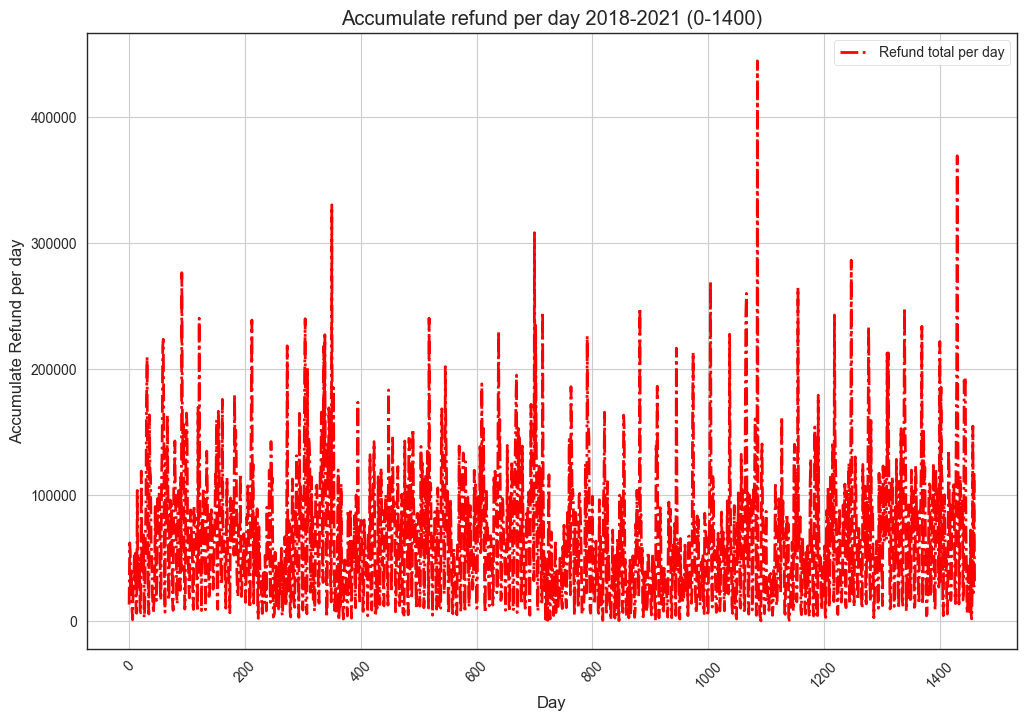

In [145]:
dataset_prepared.plot(x = 'time', y='y', color='red', linestyle='-.', label='Refund total per day', linewidth=2, markersize=12)

plt.grid()
plt.ylabel('Accumulate Refund per day')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.title("Accumulate refund per day 2018-2021 (0-1400)")
plt.show()

In [146]:
X = dataset_prepared.loc[:, ['lag']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = dataset_prepared.loc[:, 'y']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [148]:
regr = LinearRegression()

In [149]:
regr.fit(X_train, y_train)

LinearRegression()

In [150]:
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.11
R2 no set de teste: 0.12


In [151]:
m = Prophet()
m.fit(dataset_prepared)

16:16:10 - cmdstanpy - INFO - Chain [1] start processing
16:16:10 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1821 2022-12-27
1822 2022-12-28
1823 2022-12-29
1824 2022-12-30
1825 2022-12-31

In [153]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower     yhat_upper
1821 2022-12-27  86093.895232  33587.752565  139701.228320
1822 2022-12-28  86224.681048  33750.385316  136513.180939
1823 2022-12-29  71610.588251  17287.471394  122467.976479
1824 2022-12-30  58238.537694   3851.418023  107457.988308
1825 2022-12-31   7105.466887 -42828.680562   60932.114993

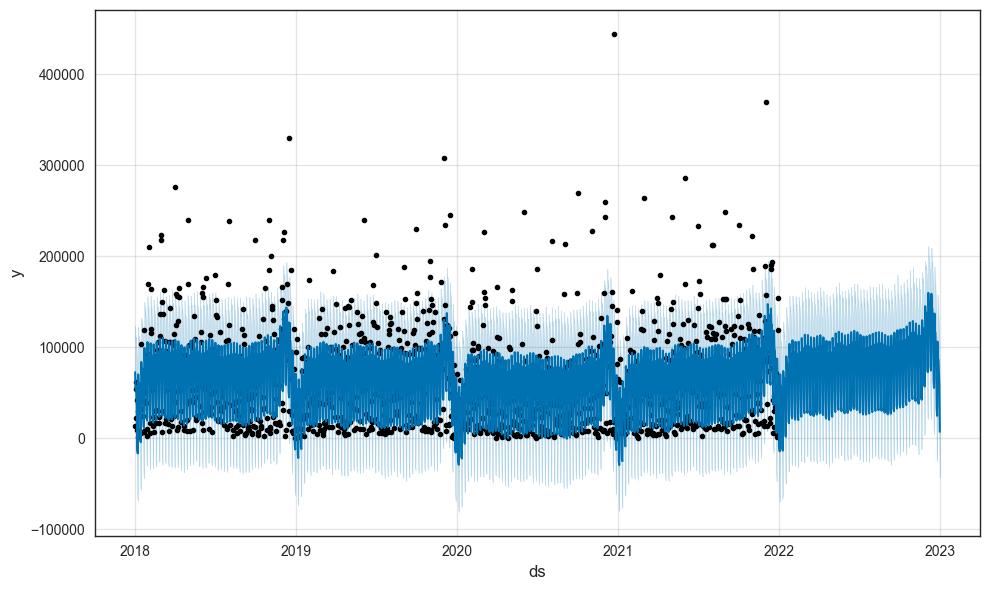

In [154]:
fig1 = m.plot(forecast)

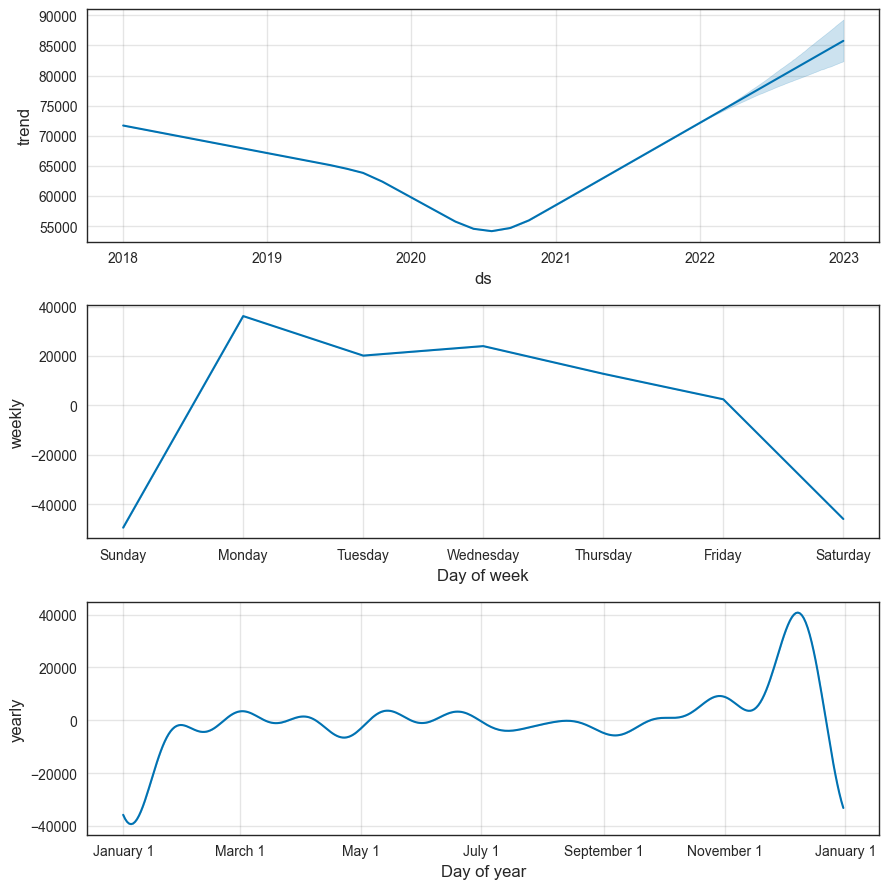

In [155]:
fig2 = m.plot_components(forecast)

In [156]:
plot_plotly(m, forecast)

In [157]:
plot_components_plotly(m, forecast)

# Refactoring base dataset

In [158]:
df_ref = df_2018.append(df_2019, ignore_index=True)
df_ref = df_ref.append(df_2020, ignore_index=True)
df_ref = df_ref.append(df_2021, ignore_index=True)

In [159]:
df_ref['DATA'] = pd.to_datetime(df_ref['DATA'], errors='coerce')
df_ref = df_ref.dropna(subset=['DATA'])
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77038 entries, 0 to 77042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                77038 non-null  int64         
 1   MES                77038 non-null  int64         
 2   SENADOR            77038 non-null  object        
 3   TIPO_DESPESA       77038 non-null  object        
 4   CNPJ_CPF           77038 non-null  object        
 5   FORNECEDOR         77038 non-null  object        
 6   DOCUMENTO          73993 non-null  object        
 7   DATA               77038 non-null  datetime64[ns]
 8   DETALHAMENTO       48399 non-null  object        
 9   VALOR_REEMBOLSADO  77038 non-null  object        
 10  COD_DOCUMENTO      77038 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 7.1+ MB


In [160]:
df_ref['VALOR_REEMBOLSADO'].replace(',','.', regex=True, inplace=True)
df_ref['VALOR_REEMBOLSADO'] = df_ref['VALOR_REEMBOLSADO'].astype(float)

In [161]:
#df_ref.drop(df_ref.loc[df_ref.DATA < '2018-01-01'].index, axis=0, inplace=True)
#df_ = pd.DataFrame(df_ref.groupby([df_ref.DATA.dt.year, df_ref.DATA.dt.month, df_ref.DATA.dt.day])['VALOR_REEMBOLSADO'].sum())
#df_


order = df_ref.groupby([df_ref.DATA.dt.year, df_ref.DATA.dt.month, df_ref.DATA.dt.day])['VALOR_REEMBOLSADO'].sum()
order_df = pd.DataFrame(order)
order_df['YEAR'] = order_df.index
order_df['MONTH'] = order_df.index
order_df['DAY'] = order_df.index
order_df['ds'] = order_df.index
#order_df.MONTH
#order_df = order_df.reset_index(drop=True)
#order_df.index = order_df.MONTH
#order_df['YEAR'] = 1*len()
#j = 0


for i in (order_df.MONTH):
    #print(i[0])
    order_df['YEAR'][i] = (i[0])
    order_df['MONTH'][i] = (i[1])
    order_df['DAY'][i] = i[2]
    #j = j+1

order_df = order_df.reset_index(drop=True)


#
#df_ref.drop(df_ref.loc[df_ref.DATA < '2018-01-01'].index, axis=0, inplace=True)
#order_df['YEAR'] = order_df.YEAR.astype(int)
#order_df['MONTH'] = order_df.MONTH.astype(int)
#order_df['DAY'] = order_df.DAY.astype(int)
order_df.drop(order_df.loc[order_df.YEAR < 2018].index, axis=0, inplace=True)
order_df.drop(order_df.loc[order_df.YEAR > 2021].index, axis=0, inplace=True)
#order_df.drop('index')
order_df = order_df.reset_index(drop=True)


#year_list = order_df.YEAR.to_list()
#month_list = order_df.MONTH.to_list()
#day_list = order_df.DAY.to_list()
#s = '-'
#year_month = s.join(


order_df['ds'] = pd.to_datetime(order_df['YEAR'].astype(str) + '-' + order_df['MONTH'].astype(str) + '-' + order_df['DAY'].astype(str))
order_df.drop(['YEAR', 'MONTH', 'DAY'], axis=1, inplace=True)
order_df.rename(columns={'VALOR_REEMBOLSADO':'y'}, inplace=True)
order_df_final = order_df[['ds', 'y']]
order_df_final.info()
order_df_final.head()
#order_df.info()
#for i in (order_df):
#    print(order_df.YEAR-order_df.MONTH-order_df.DAY)
    
#order_df.columns
#df_.index = order.index
#df_['y'] = order
#df_
#df_ref.groupby(df_ref.DATA.dt.year, df_ref.DATA.dt.month, df_ref.DATA.dt.day).agg({'VALOR_REEMBOLSADO': 'sum'}).reset_index()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1461 non-null   datetime64[ns]
 1   y       1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


ds          y
0 2018-01-01   13062.46
1 2018-01-02  209608.02
2 2018-01-03  223443.37
3 2018-01-04   39554.12
4 2018-01-05   38479.77

In [162]:
#for x in  order_df_final.select_dtypes(include=['datetime64']).columns.tolist():
#    order_df_final[x] = order_df_final[x].astype(str)

In [163]:
order_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1461 non-null   datetime64[ns]
 1   y       1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [164]:
order_df_final.head()

ds          y
0 2018-01-01   13062.46
1 2018-01-02  209608.02
2 2018-01-03  223443.37
3 2018-01-04   39554.12
4 2018-01-05   38479.77

In [165]:
order_df_final['time'] = np.arange(len(order_df_final.index))
order_df_final['lag'] = order_df_final['y'].shift(1)

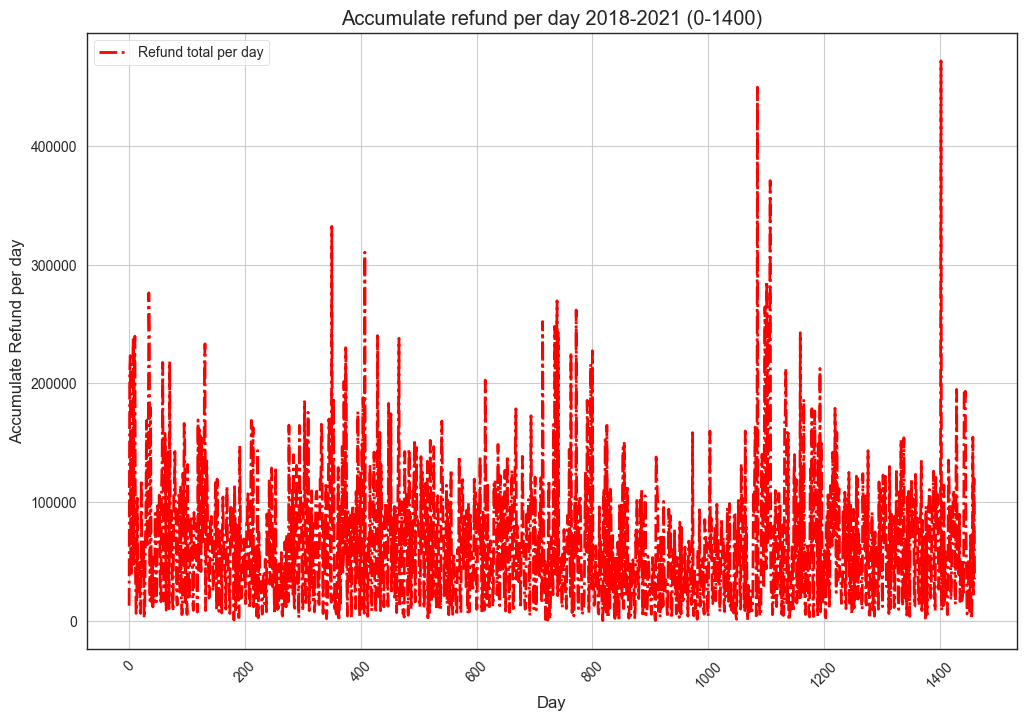

In [166]:
order_df_final.plot(x = 'time', y='y', color='red', linestyle='-.', label='Refund total per day', linewidth=2, markersize=12)

plt.grid()
plt.ylabel('Accumulate Refund per day')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.title("Accumulate refund per day 2018-2021 (0-1400)")
plt.show()

In [167]:
X = order_df_final.loc[:, ['lag']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = order_df_final.loc[:, 'y']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

In [168]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [169]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [171]:
regr = LinearRegression()

In [172]:
regr.fit(X_train, y_train)

LinearRegression()

In [173]:
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.03
R2 no set de teste: 0.02


In [174]:
m = Prophet()
m.fit(order_df_final)

16:16:16 - cmdstanpy - INFO - Chain [1] start processing
16:16:16 - cmdstanpy - INFO - Chain [1] done processing


In [175]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1821 2022-12-27
1822 2022-12-28
1823 2022-12-29
1824 2022-12-30
1825 2022-12-31

In [176]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat    yhat_lower     yhat_upper
1821 2022-12-27  107564.449953  40828.888562  169555.742298
1822 2022-12-28  113623.870831  50182.435208  182870.532044
1823 2022-12-29  107658.780540  46763.940865  171996.147878
1824 2022-12-30  103410.133833  38048.439182  165761.773469
1825 2022-12-31   77977.651695  15556.152325  140044.256735

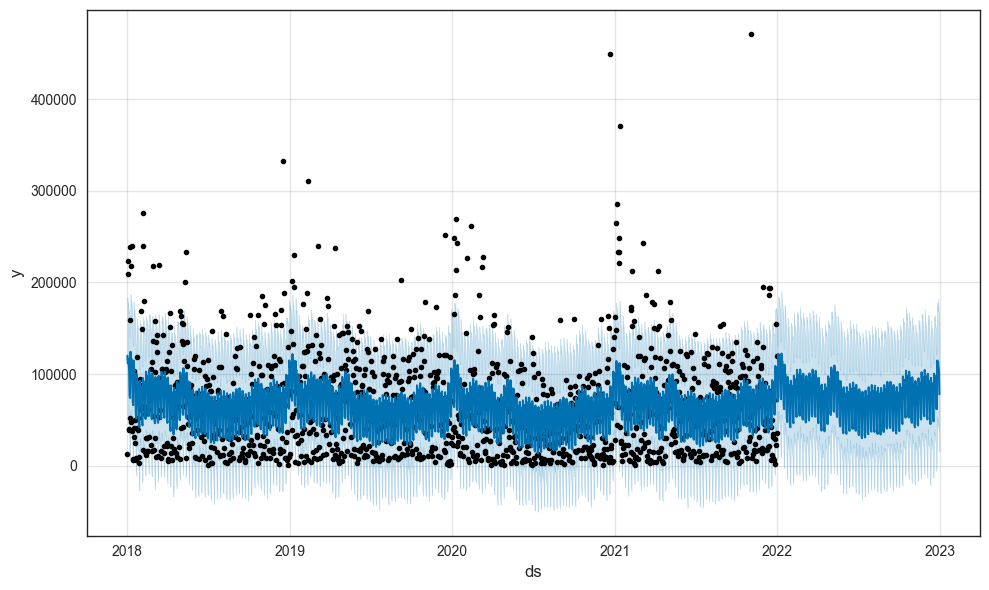

In [177]:
fig1 = m.plot(forecast)

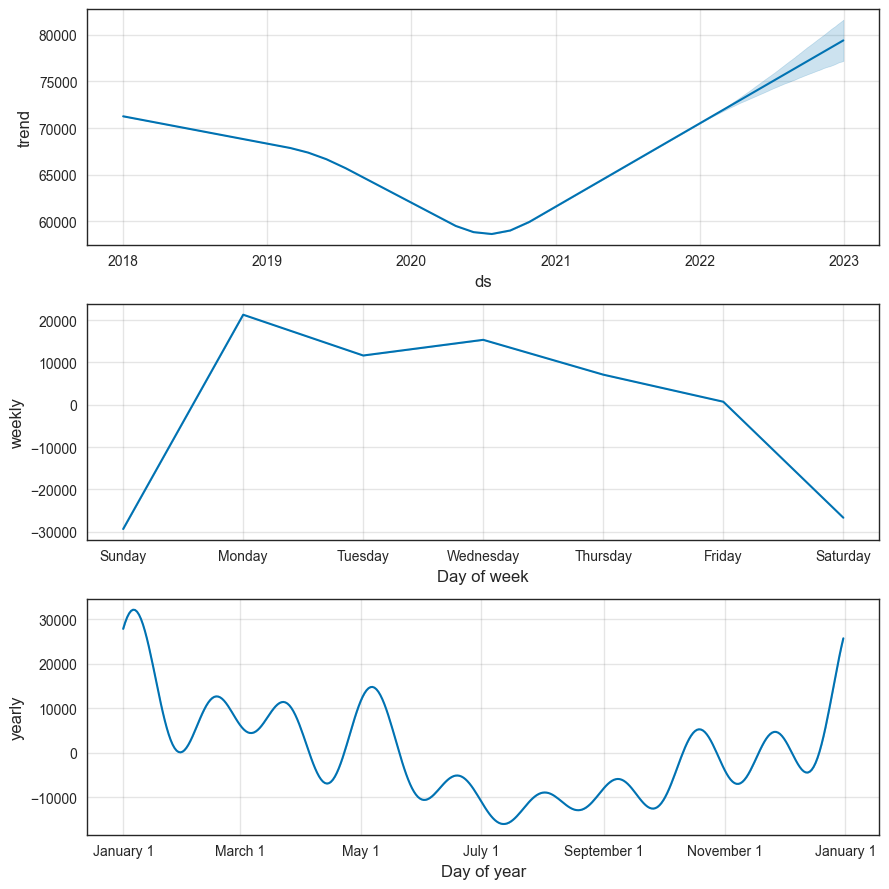

In [178]:
fig2 = m.plot_components(forecast)

In [179]:
plot_plotly(m, forecast)

In [180]:
plot_components_plotly(m, forecast)

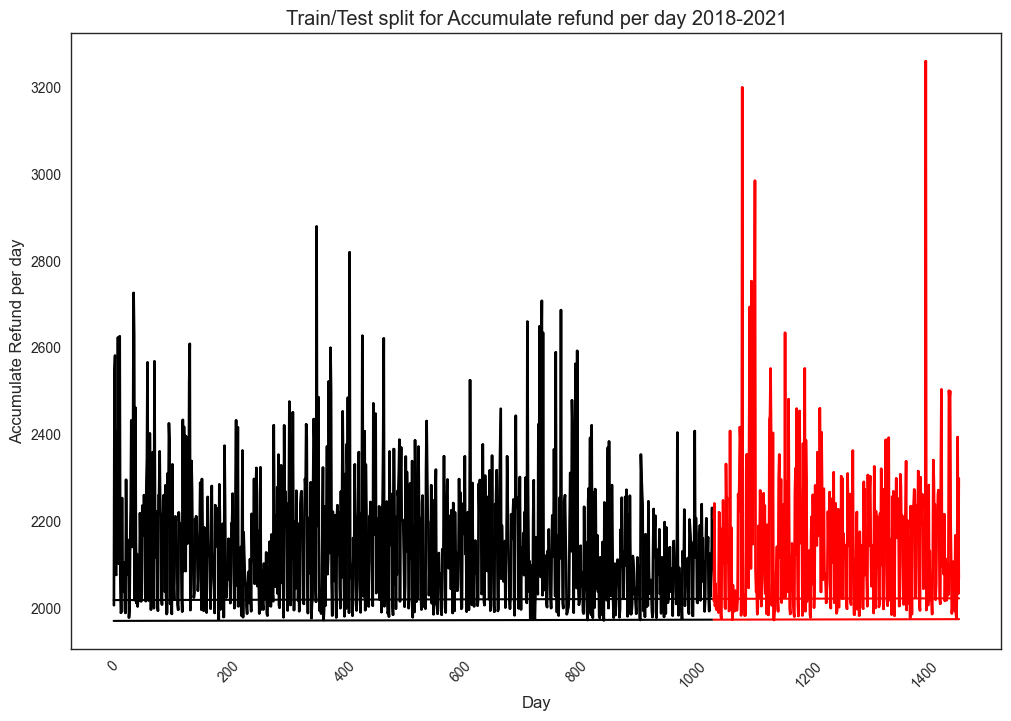

In [181]:
train = order_df_final[order_df_final.ds < "2020-11-01"]
test = order_df_final[order_df_final.ds > "2020-11-01"]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Accumulate Refund per day')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.title("Train/Test split for Accumulate refund per day 2018-2021")
plt.show()

In [182]:
y = train['y']

In [220]:
ARMAmodel = SARIMAX(y, order = (3, 0, 4))

In [221]:
ARMAmodel = ARMAmodel.fit()

C:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [222]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

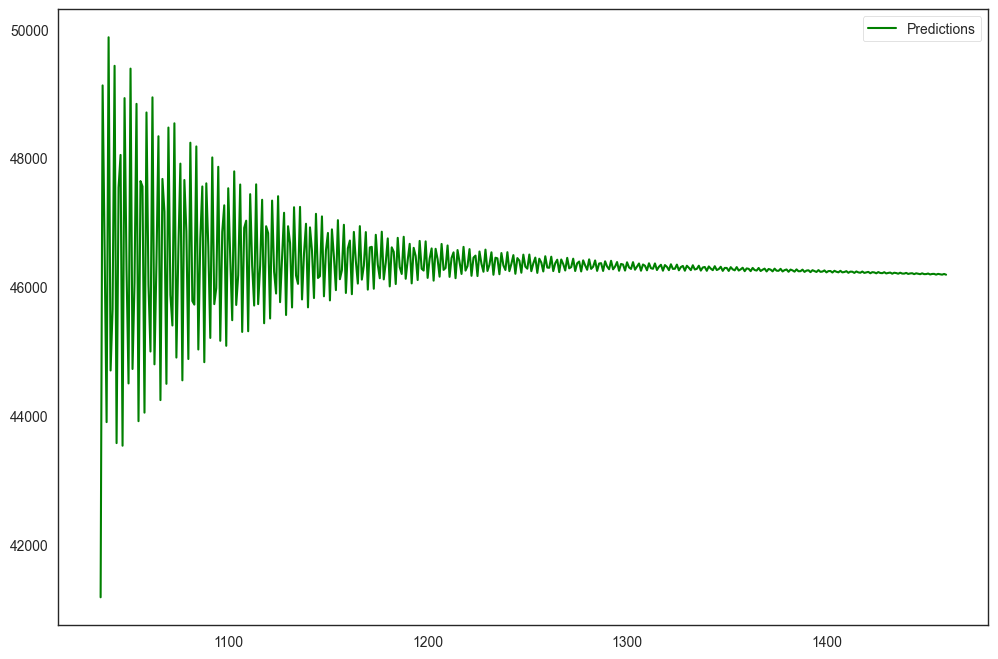

In [223]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [224]:
arma_rmse = np.sqrt(mean_squared_error(test["y"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  64409.934693611285


RMSE:  60870.02853109669


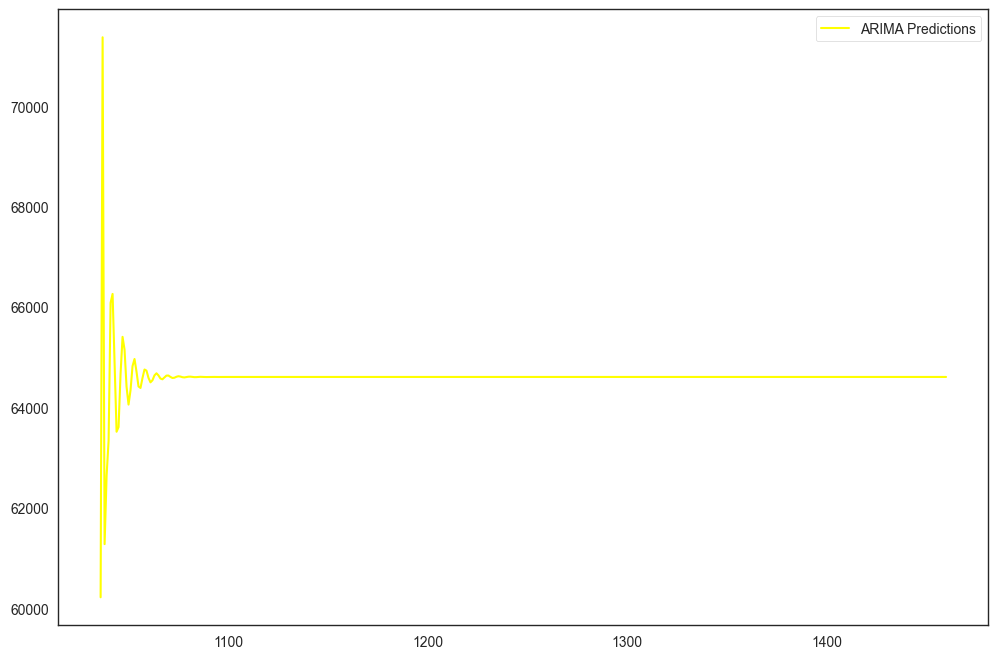

In [227]:
ARIMAmodel = ARIMA(y, order = (3, 0, 4))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test["y"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



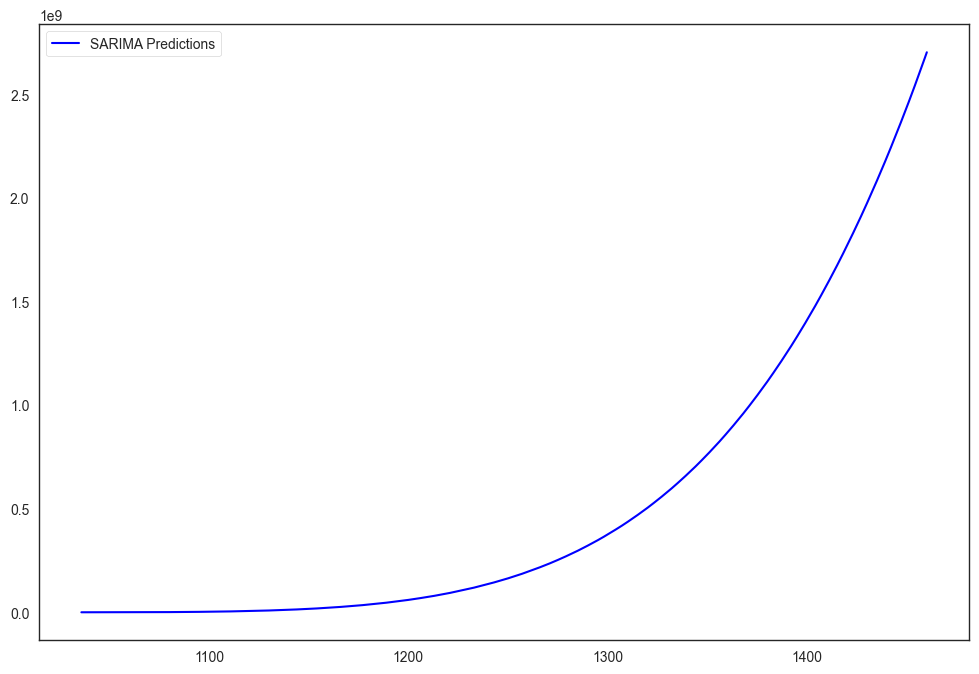

In [228]:
SARIMAXmodel = SARIMAX(y, order = (3, 4, 4), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [229]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

  0%|                                                                                      | 0/3 [00:00<?, ?it/s]16:21:21 - cmdstanpy - INFO - Chain [1] start processing
16:21:21 - cmdstanpy - INFO - Chain [1] done processing
 33%|██████████████████████████                                                    | 1/3 [00:00<00:00,  3.01it/s]16:21:22 - cmdstanpy - INFO - Chain [1] start processing
16:21:22 - cmdstanpy - INFO - Chain [1] done processing
 67%|████████████████████████████████████████████████████                          | 2/3 [00:00<00:00,  3.19it/s]16:21:22 - cmdstanpy - INFO - Chain [1] start processing
16:21:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.98it/s]


In [230]:
cutoffs = pd.to_datetime(['2018-02-15', '2019-08-15', '2020-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                      | 0/3 [00:00<?, ?it/s]16:21:23 - cmdstanpy - INFO - Chain [1] start processing
16:21:23 - cmdstanpy - INFO - Chain [1] done processing
 33%|██████████████████████████                                                    | 1/3 [00:00<00:00,  3.09it/s]16:21:23 - cmdstanpy - INFO - Chain [1] start processing
16:21:23 - cmdstanpy - INFO - Chain [1] done processing
 67%|████████████████████████████████████████████████████                          | 2/3 [00:00<00:00,  3.22it/s]16:21:24 - cmdstanpy - INFO - Chain [1] start processing
16:21:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.30it/s]


In [231]:
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse          rmse           mae      mape     mdape  \
0 37 days  5.480649e+09  74031.408685  47578.411645  1.449478  0.628718   
1 38 days  5.531033e+09  74370.917544  47610.641154  1.399664  0.628718   
2 39 days  5.238445e+09  72377.100356  46099.246191  1.339016  0.620766   
3 40 days  4.889441e+09  69924.539788  44704.591002  1.358982  0.628718   
4 41 days  4.800469e+09  69285.420300  44411.380865  1.410190  0.628718   

      smape  coverage  
0  0.692022  0.795107  
1  0.691568  0.801223  
2  0.675404  0.810398  
3  0.677462  0.813456  
4  0.688695  0.816514

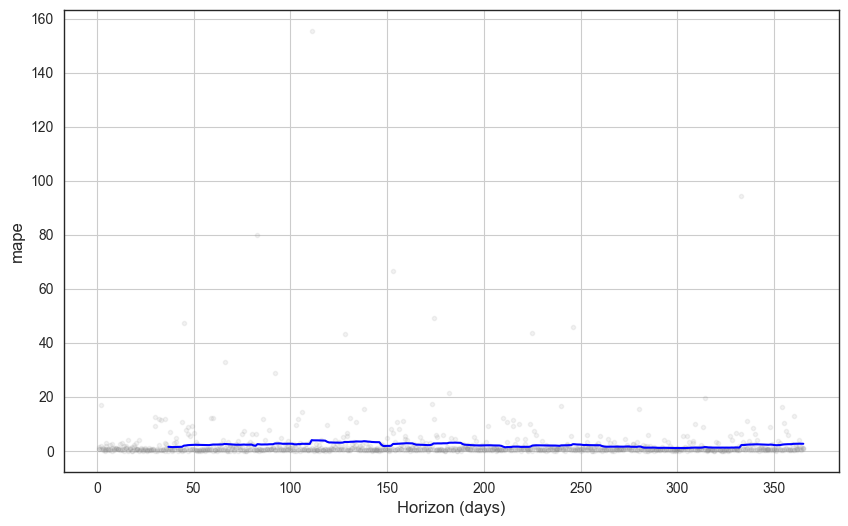

In [232]:
fig = plot_cross_validation_metric(df_cv, metric='mape')